<a href="https://colab.research.google.com/github/dayaiit/test/blob/main/L5_MML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Linear Mappings: From Basic Concepts to Machine Learning Applications

# Section 1: Introduction to Mappings and Functions

## Setup and Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import sympy as sp
from scipy import linalg
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression, load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# For better visualization
plt.style.use('seaborn-v0_8')
np.set_printoptions(precision=3, suppress=True)

# Custom 3D arrow class for better visualizations
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


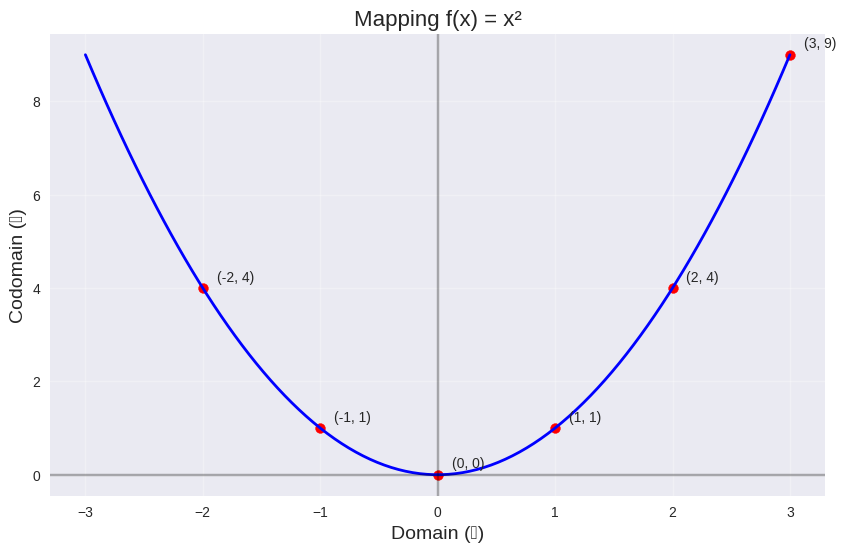

In [3]:

## 1.1 Basic Mappings and Functions

# Example 1: Simple mapping f(x) = x²
def f(x):
    """Basic mapping f: ℝ → ℝ defined by f(x) = x²"""
    return x**2

# Visualize the mapping
x = np.linspace(-3, 3, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Mapping f(x) = x²', fontsize=16)
plt.xlabel('Domain (ℝ)', fontsize=14)
plt.ylabel('Codomain (ℝ)', fontsize=14)

# Mark specific points
points_x = [-2, -1, 0, 1, 2, 3]
points_y = [f(px) for px in points_x]
plt.scatter(points_x, points_y, color='red', s=50)

for px, py in zip(points_x, points_y):
    plt.annotate(f'({px}, {py})', (px, py), xytext=(10, 5), textcoords='offset points')

plt.show()


<ipython-input-4-586425305ff9>:51: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from font(s) Liberation Sans.
  plt.tight_layout()


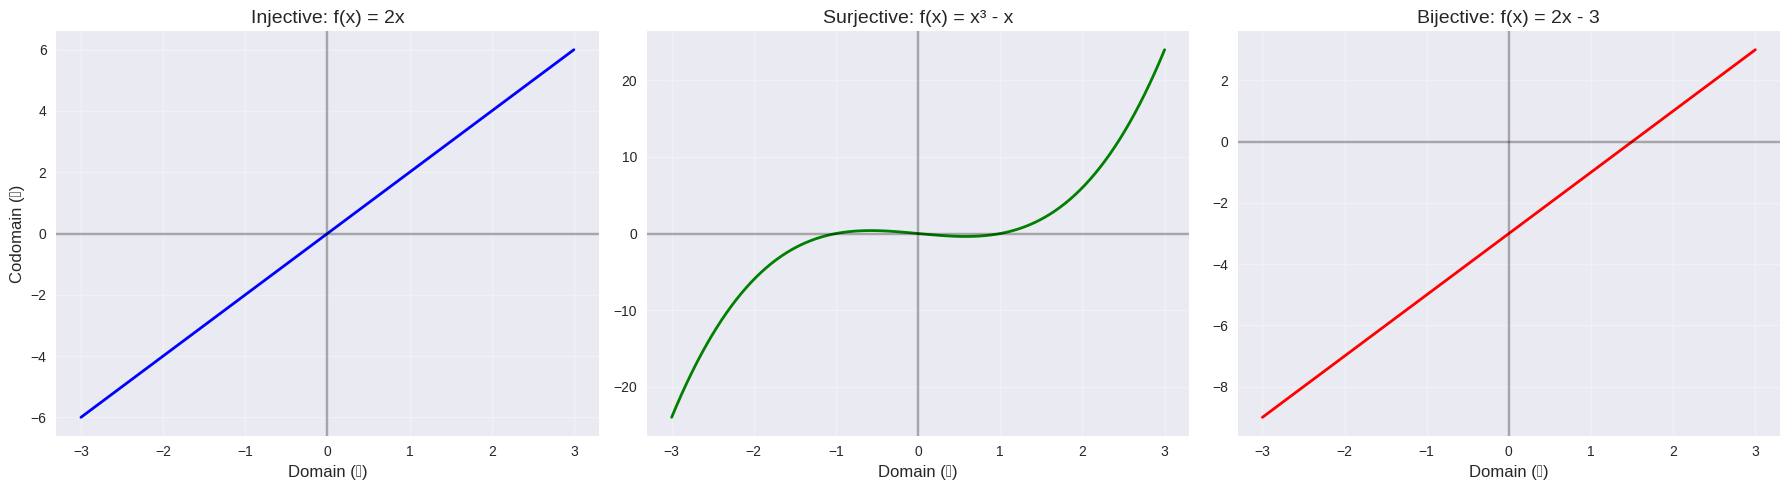

In [4]:
## 1.2 Types of Mappings

# Example of an injective (one-to-one) mapping: f(x) = 2x
def injective_f(x):
    """Injective mapping f: ℝ → ℝ defined by f(x) = 2x"""
    return 2*x

# Example of a surjective (onto) mapping: f(x) = x³ - x
def surjective_f(x):
    """Surjective mapping f: ℝ → ℝ defined by f(x) = x³ - x"""
    return x**3 - x

# Example of a bijective (one-to-one and onto) mapping: f(x) = 2x - 3
def bijective_f(x):
    """Bijective mapping f: ℝ → ℝ defined by f(x) = 2x - 3"""
    return 2*x - 3

# Visualize all three types
x = np.linspace(-3, 3, 100)
y1 = injective_f(x)
y2 = surjective_f(x)
y3 = bijective_f(x)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Injective
axes[0].plot(x, y1, 'b-', linewidth=2)
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('Injective: f(x) = 2x', fontsize=14)
axes[0].set_xlabel('Domain (ℝ)', fontsize=12)
axes[0].set_ylabel('Codomain (ℝ)', fontsize=12)

# Surjective
axes[1].plot(x, y2, 'g-', linewidth=2)
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Surjective: f(x) = x³ - x', fontsize=14)
axes[1].set_xlabel('Domain (ℝ)', fontsize=12)

# Bijective
axes[2].plot(x, y3, 'r-', linewidth=2)
axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[2].grid(True, alpha=0.3)
axes[2].set_title('Bijective: f(x) = 2x - 3', fontsize=14)
axes[2].set_xlabel('Domain (ℝ)', fontsize=12)

plt.tight_layout()
plt.show()


(g ∘ f)(x) = g(f(x)) = g(x²) = 2*x**2 - 3
(f ∘ g)(x) = f(g(x)) = f(2x - 3) = (2*x - 3)**2


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8728 (\N{RING OPERATOR}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


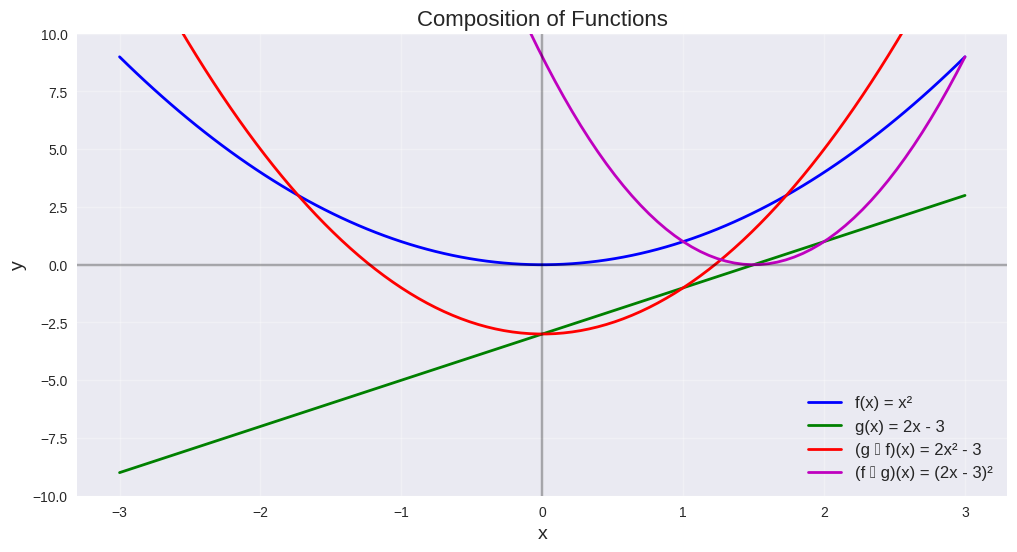

In [5]:
## 1.3 Composition of Mappings

# Define the functions f(x) = x² and g(x) = 2x - 3
def f(x):
    return x**2

def g(x):
    return 2*x - 3

# Compose f and g
def g_of_f(x):
    """Composition (g ∘ f)(x) = g(f(x))"""
    return g(f(x))

def f_of_g(x):
    """Composition (f ∘ g)(x) = f(g(x))"""
    return f(g(x))

# Verify the composition algebraically
x_sym = sp.symbols('x')
g_of_f_sym = g(f(x_sym))
f_of_g_sym = f(g(x_sym))

print(f"(g ∘ f)(x) = g(f(x)) = g(x²) = {g_of_f_sym}")
print(f"(f ∘ g)(x) = f(g(x)) = f(2x - 3) = {f_of_g_sym}")

# Visualize the compositions
x = np.linspace(-3, 3, 100)
y_f = f(x)
y_g = g(x)
y_g_of_f = g_of_f(x)
y_f_of_g = f_of_g(x)

plt.figure(figsize=(12, 6))
plt.plot(x, y_f, 'b-', linewidth=2, label='f(x) = x²')
plt.plot(x, y_g, 'g-', linewidth=2, label='g(x) = 2x - 3')
plt.plot(x, y_g_of_f, 'r-', linewidth=2, label='(g ∘ f)(x) = 2x² - 3')
plt.plot(x, y_f_of_g, 'm-', linewidth=2, label='(f ∘ g)(x) = (2x - 3)²')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.title('Composition of Functions', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.ylim(-10, 10)
plt.show()



Projection onto xy-plane:
F(v) = [1 2 0]
F(w) = [4 5 0]
F(v + w) = [5 7 0]
F(v) + F(w) = [5 7 0]
Property 1 (Preserves Addition): True
F(k*v) = [2 4 0]
k*F(v) = [2 4 0]
Property 2 (Preserves Scalar Multiplication): True
Therefore, the projection mapping is linear


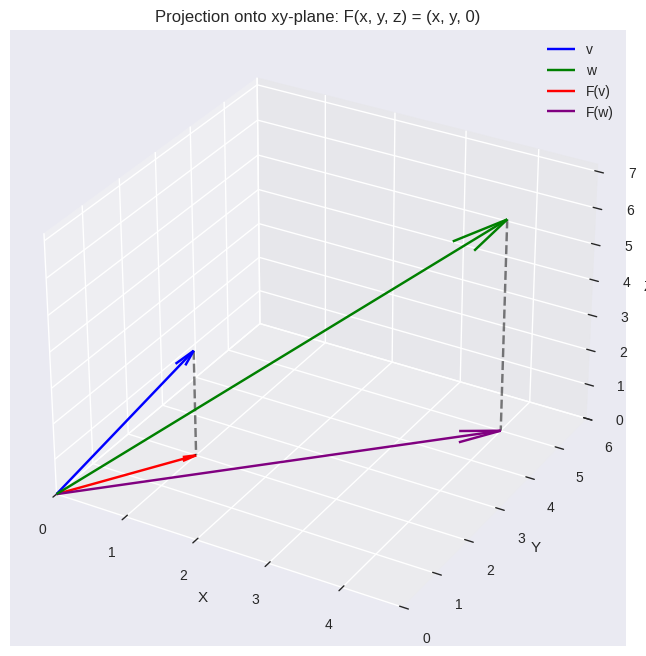

In [6]:

# Section 2: Linear Mappings

## 2.1 Definition and Verification of Linear Mappings

# Example 1: Projection onto xy-plane
def projection_xy(vector):
    """Linear mapping F: ℝ³ → ℝ³ defined by F(x, y, z) = (x, y, 0)"""
    x, y, z = vector
    return np.array([x, y, 0])

# Test the linearity properties
def verify_linearity(F, v, w, k=2):
    """Verify if a mapping F is linear by checking if it preserves addition and scalar multiplication"""
    # Property 1: F(v + w) = F(v) + F(w)
    property1 = np.allclose(F(v + w), F(v) + F(w))

    # Property 2: F(kv) = kF(v)
    property2 = np.allclose(F(k * v), k * F(v))

    return property1, property2

# Test vectors for the projection mapping
v = np.array([1, 2, 3])
w = np.array([4, 5, 6])
k = 2

# Verify linearity
property1, property2 = verify_linearity(projection_xy, v, w, k)
print(f"Projection onto xy-plane:")
print(f"F(v) = {projection_xy(v)}")
print(f"F(w) = {projection_xy(w)}")
print(f"F(v + w) = {projection_xy(v + w)}")
print(f"F(v) + F(w) = {projection_xy(v) + projection_xy(w)}")
print(f"Property 1 (Preserves Addition): {property1}")
print(f"F(k*v) = {projection_xy(k*v)}")
print(f"k*F(v) = {k*projection_xy(v)}")
print(f"Property 2 (Preserves Scalar Multiplication): {property2}")
print(f"Therefore, the projection mapping is {'linear' if property1 and property2 else 'not linear'}")

# Visualize the projection mapping
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Original vectors
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.1, label='v')
ax.quiver(0, 0, 0, w[0], w[1], w[2], color='green', arrow_length_ratio=0.1, label='w')

# Projected vectors
v_proj = projection_xy(v)
w_proj = projection_xy(w)
ax.quiver(0, 0, 0, v_proj[0], v_proj[1], v_proj[2], color='red', arrow_length_ratio=0.1, label='F(v)')
ax.quiver(0, 0, 0, w_proj[0], w_proj[1], w_proj[2], color='purple', arrow_length_ratio=0.1, label='F(w)')

# Add dashed lines to show projection
ax.plot([v[0], v_proj[0]], [v[1], v_proj[1]], [v[2], v_proj[2]], 'k--', alpha=0.5)
ax.plot([w[0], w_proj[0]], [w[1], w_proj[1]], [w[2], w_proj[2]], 'k--', alpha=0.5)

# Set labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, max(v[0], w[0]) * 1.2])
ax.set_ylim([0, max(v[1], w[1]) * 1.2])
ax.set_zlim([0, max(v[2], w[2]) * 1.2])
ax.legend()
ax.set_title('Projection onto xy-plane: F(x, y, z) = (x, y, 0)')

plt.show()


In [7]:

## 2.2 Non-examples of Linear Mappings

# Example 1: Translation G(x, y) = (x + 1, y + 2)
def translation_g(vector):
    """Non-linear mapping G: ℝ² → ℝ² defined by G(x, y) = (x + 1, y + 2)"""
    x, y = vector
    return np.array([x + 1, y + 2])



Translation G(x, y) = (x + 1, y + 2):
G(0, 0) = [1 2]
G(v) = [2 4]
G(w) = [4 6]
G(v + w) = [5 8]
G(v) + G(w) = [ 6 10]
Property 1 (Preserves Addition): False
G(k*v) = [3 6]
k*G(v) = [4 8]
Property 2 (Preserves Scalar Multiplication): False
Therefore, the translation mapping is not linear

Square function H(x) = x²:
H(x + y) = H(2 + 3) = H(5) = 25
H(x) + H(y) = H(2) + H(3) = 4 + 9 = 13
Since 25 ≠ 13, the square function is not linear


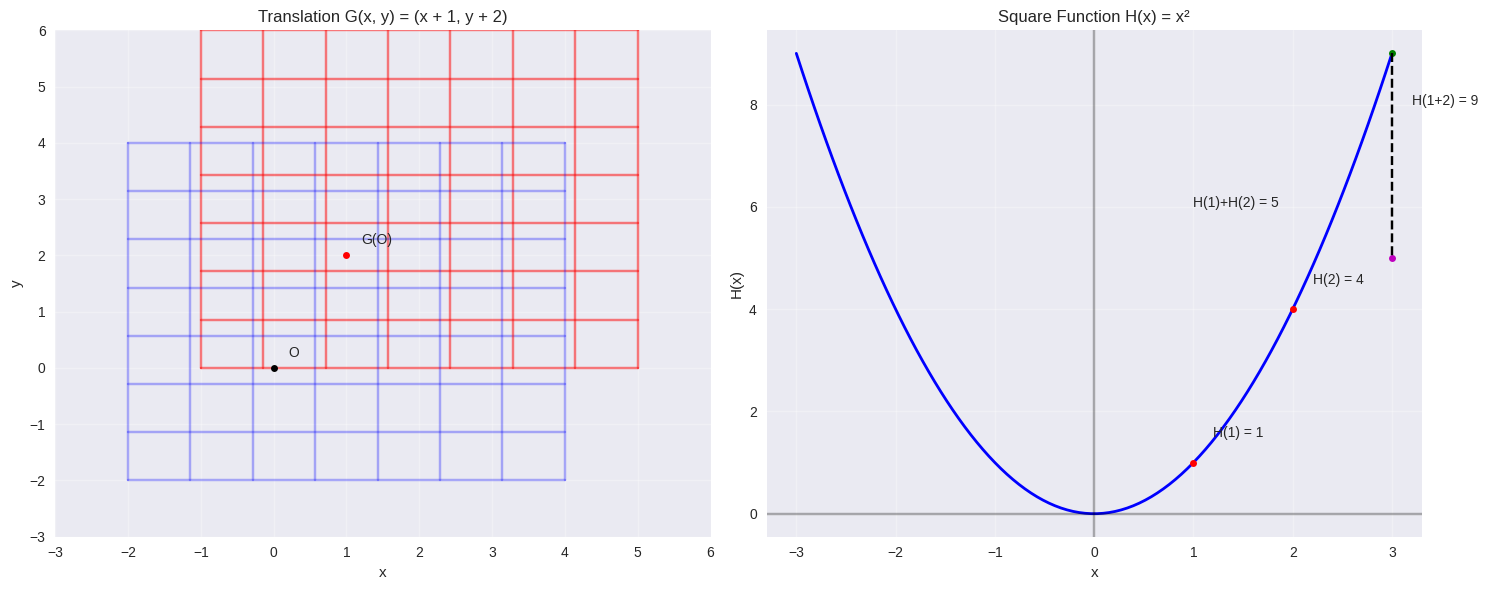

In [8]:

# Example 2: Square function H(x) = x²
def square_h(x):
    """Non-linear mapping H: ℝ → ℝ defined by H(x) = x²"""
    return x**2

# Test vectors for the translation mapping
v = np.array([1, 2])
w = np.array([3, 4])
zero = np.array([0, 0])
k = 2

# Check if translation is linear
property1, property2 = verify_linearity(translation_g, v, w, k)
print("\nTranslation G(x, y) = (x + 1, y + 2):")
print(f"G(0, 0) = {translation_g(zero)}")  # Should be (0, 0) if linear
print(f"G(v) = {translation_g(v)}")
print(f"G(w) = {translation_g(w)}")
print(f"G(v + w) = {translation_g(v + w)}")
print(f"G(v) + G(w) = {translation_g(v) + translation_g(w)}")
print(f"Property 1 (Preserves Addition): {property1}")
print(f"G(k*v) = {translation_g(k*v)}")
print(f"k*G(v) = {k*translation_g(v)}")
print(f"Property 2 (Preserves Scalar Multiplication): {property2}")
print(f"Therefore, the translation mapping is {'linear' if property1 and property2 else 'not linear'}")

# Verify square function is not linear
def verify_square_linearity():
    x = 2
    y = 3

    # Check F(x + y) = F(x) + F(y)
    lhs = square_h(x + y)
    rhs = square_h(x) + square_h(y)

    print(f"\nSquare function H(x) = x²:")
    print(f"H(x + y) = H({x} + {y}) = H({x+y}) = {lhs}")
    print(f"H(x) + H(y) = H({x}) + H({y}) = {square_h(x)} + {square_h(y)} = {rhs}")
    print(f"Since {lhs} ≠ {rhs}, the square function is not linear")

verify_square_linearity()

# Visualize both non-linear mappings
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Translation mapping visualization
grid_x, grid_y = np.meshgrid(np.linspace(-2, 4, 8), np.linspace(-2, 4, 8))
grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])

# Apply transformation to all grid points
transformed_points = np.array([translation_g(point) for point in grid_points])
grid_x_transformed = transformed_points[:, 0].reshape(grid_x.shape)
grid_y_transformed = transformed_points[:, 1].reshape(grid_y.shape)

# Plot original and transformed grid
for i in range(grid_x.shape[0]):
    axes[0].plot(grid_x[i, :], grid_y[i, :], 'b-', alpha=0.3)
    axes[0].plot(grid_x[:, i], grid_y[:, i], 'b-', alpha=0.3)
    axes[0].plot(grid_x_transformed[i, :], grid_y_transformed[i, :], 'r-', alpha=0.5)
    axes[0].plot(grid_x_transformed[:, i], grid_y_transformed[:, i], 'r-', alpha=0.5)

axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Translation G(x, y) = (x + 1, y + 2)')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-3, 6)
axes[0].set_ylim(-3, 6)
axes[0].plot(0, 0, 'ko', markersize=5)  # Origin
axes[0].plot(1, 2, 'ro', markersize=5)  # G(0, 0)
axes[0].annotate('O', (0, 0), xytext=(0.2, 0.2))
axes[0].annotate('G(O)', (1, 2), xytext=(1.2, 2.2))

# Square function visualization
x = np.linspace(-3, 3, 100)
y = square_h(x)

axes[1].plot(x, y, 'b-', linewidth=2)
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)
axes[1].grid(True, alpha=0.3)
axes[1].set_title('Square Function H(x) = x²')
axes[1].set_xlabel('x')
axes[1].set_ylabel('H(x)')

# Illustrate why H is not linear
x1, x2 = 1, 2
axes[1].plot([x1], [square_h(x1)], 'ro', markersize=5)
axes[1].plot([x2], [square_h(x2)], 'ro', markersize=5)
axes[1].plot([x1 + x2], [square_h(x1 + x2)], 'go', markersize=5)
axes[1].plot([x1 + x2], [square_h(x1) + square_h(x2)], 'mo', markersize=5)

axes[1].annotate(f'H({x1}) = {square_h(x1)}', (x1, square_h(x1)), xytext=(x1 + 0.2, square_h(x1) + 0.5))
axes[1].annotate(f'H({x2}) = {square_h(x2)}', (x2, square_h(x2)), xytext=(x2 + 0.2, square_h(x2) + 0.5))
axes[1].annotate(f'H({x1}+{x2}) = {square_h(x1+x2)}', (x1 + x2, square_h(x1 + x2)), xytext=(x1 + x2 + 0.2, square_h(x1 + x2) - 1))
axes[1].annotate(f'H({x1})+H({x2}) = {square_h(x1) + square_h(x2)}', (x1 + x2, square_h(x1) + square_h(x2)), xytext=(x1 + x2 - 2, square_h(x1) + square_h(x2) + 1))

# Draw a connecting line to show the difference
axes[1].plot([x1 + x2, x1 + x2], [square_h(x1 + x2), square_h(x1) + square_h(x2)], 'k--')

plt.tight_layout()
plt.show()


Finding the kernel of F(x, y, z) = (x + y + z, x - y):
We need to solve the system:
  x + y + z = 0
  x - y = 0

From the second equation: x = y
Substituting into the first: x + x + z = 0 => 2x + z = 0 => z = -2x

So the kernel is: Ker F = {(t, t, -2t) : t ∈ ℝ}

Verification with t = 3:
Vector in kernel: [ 3  3 -6]
F(vector) = [0 0]
Is this the zero vector? True


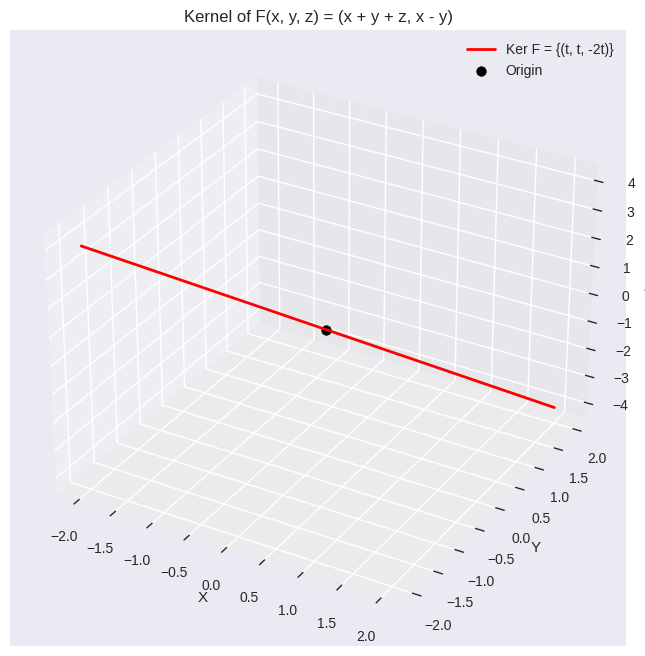

In [9]:

# Section 3: Kernel and Image of Linear Mappings

## 3.1 Kernel (Null Space)

# Define a linear mapping F: ℝ³ → ℝ² by F(x, y, z) = (x + y + z, x - y)
def linear_mapping_F(vector):
    """Linear mapping F: ℝ³ → ℝ² defined by F(x, y, z) = (x + y + z, x - y)"""
    x, y, z = vector
    return np.array([x + y + z, x - y])

# Find the kernel of F
def find_kernel_F():
    """Find the kernel of F: ℝ³ → ℝ² defined by F(x, y, z) = (x + y + z, x - y)"""
    # We need to solve the system of equations:
    # x + y + z = 0
    # x - y = 0

    # From x - y = 0, we get x = y
    # Substituting into x + y + z = 0, we get x + x + z = 0 => 2x + z = 0 => z = -2x

    # So the kernel is {(t, t, -2t) : t ∈ ℝ}
    # Let's verify this:
    t = sp.symbols('t')
    v = sp.Matrix([t, t, -2*t])
    result = sp.Matrix([v[0] + v[1] + v[2], v[0] - v[1]])

    print("Finding the kernel of F(x, y, z) = (x + y + z, x - y):")
    print("We need to solve the system:")
    print("  x + y + z = 0")
    print("  x - y = 0")
    print("\nFrom the second equation: x = y")
    print("Substituting into the first: x + x + z = 0 => 2x + z = 0 => z = -2x")
    print("\nSo the kernel is: Ker F = {(t, t, -2t) : t ∈ ℝ}")

    # Verify with a specific value
    t_val = 3
    kernel_vector = np.array([t_val, t_val, -2*t_val])
    mapped_vector = linear_mapping_F(kernel_vector)

    print(f"\nVerification with t = {t_val}:")
    print(f"Vector in kernel: {kernel_vector}")
    print(f"F(vector) = {mapped_vector}")
    print(f"Is this the zero vector? {np.allclose(mapped_vector, np.zeros(2))}")

    return lambda t: np.array([t, t, -2*t])

kernel_F_function = find_kernel_F()

# Visualize the kernel of F
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the kernel as a line in ℝ³
t_values = np.linspace(-2, 2, 100)
kernel_points = np.array([kernel_F_function(t) for t in t_values])

ax.plot(kernel_points[:, 0], kernel_points[:, 1], kernel_points[:, 2], 'r-', linewidth=2, label='Ker F = {(t, t, -2t)}')
ax.scatter(0, 0, 0, color='k', s=50, label='Origin')  # Origin

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Kernel of F(x, y, z) = (x + y + z, x - y)')
ax.legend()

plt.show()



Finding the image of F(x, y, z) = (x + y + z, x - y):
Let (a, b) be any point in the image of F
We need to find x, y, z such that:
  x + y + z = a
  x - y = b

From the second equation: x = b + y
Substituting into the first: (b + y) + y + z = a => b + 2y + z = a => z = a - b - 2y

For any (a, b) in ℝ², we can find a valid preimage by choosing any value for y and then:
  x = b + y
  z = a - b - 2y

Since every point (a, b) in ℝ² has a preimage, Im F = ℝ²

Verification with point (a, b) = (5, 2):
Choose y = 1
Then x = b + y = 2 + 1 = 3
And z = a - b - 2y = 5 - 2 - 2(1) = 1
So the point (3, 1, 1) maps to (5, 2)
F(3, 1, 1) = [5 2]
Is this equal to (a, b) = (5, 2)? True


<ipython-input-10-d385495d51ae>:81: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from font(s) Liberation Sans.
  plt.tight_layout()


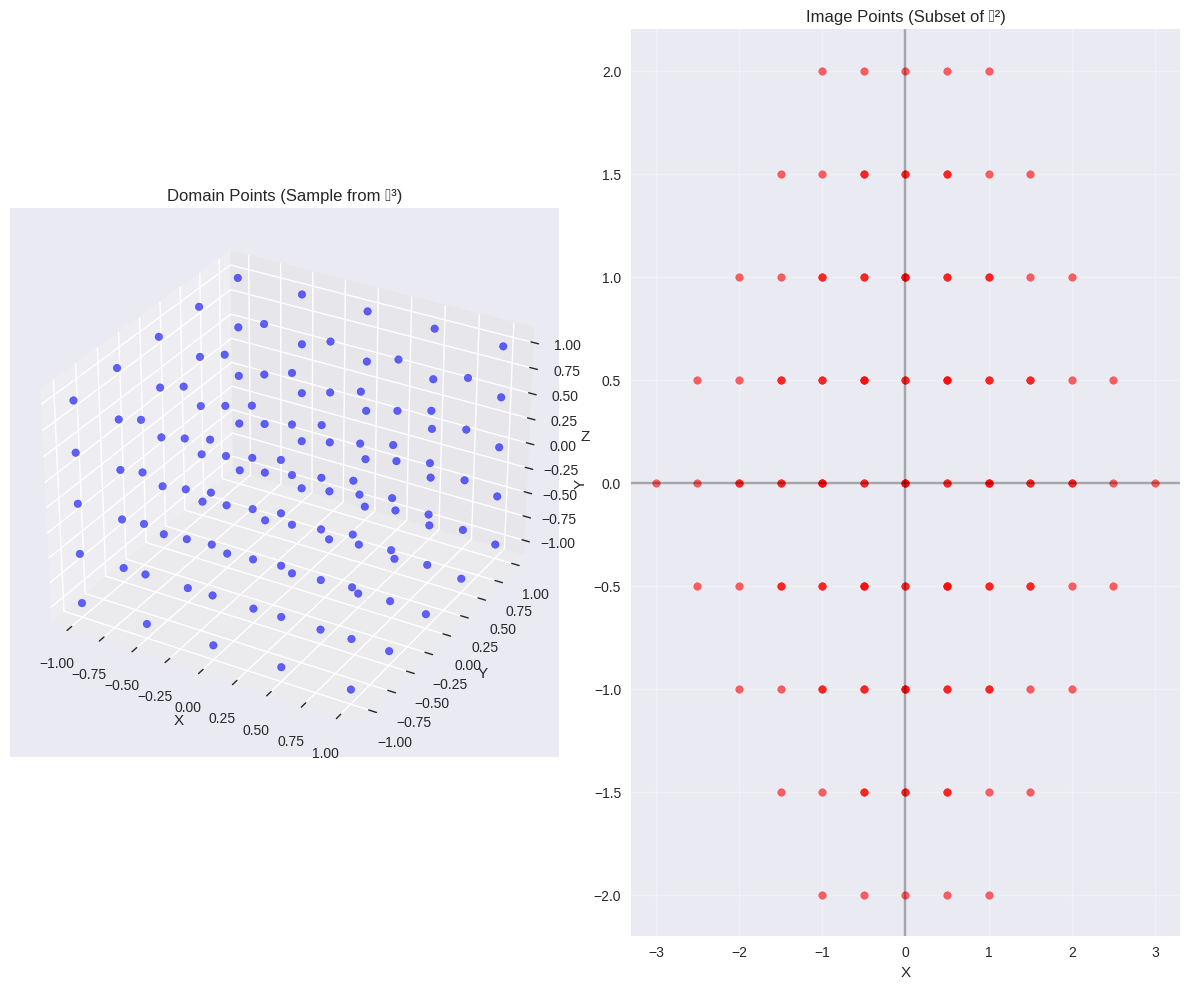

In [10]:

## 3.2 Image (Range)

# Find the image of F
def find_image_F():
    """Find the image of F: ℝ³ → ℝ² defined by F(x, y, z) = (x + y + z, x - y)"""
    # We want to determine what subset of ℝ² is the image of F
    # Let (a, b) be any point in Im F
    # We need to find x, y, z such that:
    # x + y + z = a
    # x - y = b

    # From the second equation: x = b + y
    # Substituting into the first: (b + y) + y + z = a => b + 2y + z = a => z = a - b - 2y

    # For any choice of y, we can find valid x and z:
    # x = b + y
    # z = a - b - 2y

    # This means for any point (a, b) in ℝ², we can find a preimage
    # So Im F = ℝ²

    print("\nFinding the image of F(x, y, z) = (x + y + z, x - y):")
    print("Let (a, b) be any point in the image of F")
    print("We need to find x, y, z such that:")
    print("  x + y + z = a")
    print("  x - y = b")
    print("\nFrom the second equation: x = b + y")
    print("Substituting into the first: (b + y) + y + z = a => b + 2y + z = a => z = a - b - 2y")
    print("\nFor any (a, b) in ℝ², we can find a valid preimage by choosing any value for y and then:")
    print("  x = b + y")
    print("  z = a - b - 2y")
    print("\nSince every point (a, b) in ℝ² has a preimage, Im F = ℝ²")

    # Verify with specific values
    a, b = 5, 2  # Any point in ℝ²
    y = 1  # Arbitrary choice
    x = b + y  # = 3
    z = a - b - 2*y  # = 1

    print(f"\nVerification with point (a, b) = ({a}, {b}):")
    print(f"Choose y = {y}")
    print(f"Then x = b + y = {b} + {y} = {x}")
    print(f"And z = a - b - 2y = {a} - {b} - 2({y}) = {z}")
    print(f"So the point ({x}, {y}, {z}) maps to ({a}, {b})")
    print(f"F({x}, {y}, {z}) = {linear_mapping_F(np.array([x, y, z]))}")
    print(f"Is this equal to (a, b) = ({a}, {b})? {np.allclose(linear_mapping_F(np.array([x, y, z])), np.array([a, b]))}")

    return "ℝ²"  # The image is the entire ℝ²

image_F = find_image_F()

# Visualize the mapping F and its image
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Domain (ℝ³) - show a grid of points
x = y = np.linspace(-1, 1, 5)
z = np.linspace(-1, 1, 5)
x_grid, y_grid, z_grid = np.meshgrid(x, y, z)

points = np.vstack([x_grid.ravel(), y_grid.ravel(), z_grid.ravel()]).T
mapped_points = np.array([linear_mapping_F(p) for p in points])

# Plot domain points
ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', s=30, alpha=0.6)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Domain Points (Sample from ℝ³)')

# Plot image points
ax2.scatter(mapped_points[:, 0], mapped_points[:, 1], c='red', s=30, alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Image Points (Subset of ℝ²)')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


In [11]:

## 3.3 Rank-Nullity Theorem

def demonstrate_rank_nullity():
    """Demonstrate the Rank-Nullity Theorem for linear mapping F: ℝ³ → ℝ²"""
    # Matrix representation of F(x, y, z) = (x + y + z, x - y)
    A = np.array([[1, 1, 1], [1, -1, 0]])

    # Find the rank (dimension of the image)
    rank = np.linalg.matrix_rank(A)

    # Find the nullity (dimension of the kernel)
    # For simplicity, we'll use the fact that nullity = dim(domain) - rank
    domain_dim = A.shape[1]  # Number of columns
    nullity = domain_dim - rank

    print("Rank-Nullity Theorem Demonstration:")
    print(f"Matrix representation of F:\n{A}")
    print(f"\nDimension of the domain (ℝ³): {domain_dim}")
    print(f"Rank of F (dimension of the image): {rank}")
    print(f"Nullity of F (dimension of the kernel): {nullity}")
    print(f"\nRank-Nullity Theorem states: dim(domain) = rank + nullity")
    print(f"{domain_dim} = {rank} + {nullity}, which is {rank + nullity == domain_dim}")

    # Verify our earlier results
    print("\nComparing with our earlier findings:")
    print(f"Kernel: {'{(t, t, -2t) : t ∈ ℝ}'} has dimension 1")
    print(f"Image: ℝ² has dimension 2")
    print(f"1 + 2 = 3 ✓")

demonstrate_rank_nullity()


Rank-Nullity Theorem Demonstration:
Matrix representation of F:
[[ 1  1  1]
 [ 1 -1  0]]

Dimension of the domain (ℝ³): 3
Rank of F (dimension of the image): 2
Nullity of F (dimension of the kernel): 1

Rank-Nullity Theorem states: dim(domain) = rank + nullity
3 = 2 + 1, which is True

Comparing with our earlier findings:
Kernel: {(t, t, -2t) : t ∈ ℝ} has dimension 1
Image: ℝ² has dimension 2
1 + 2 = 3 ✓


Matrix Representation of the Projection Mapping F(x, y, z) = (x, y, 0):
A = 
[[1 0 0]
 [0 1 0]
 [0 0 0]]

Test with vector v = [3 4 5]
Result using matrix: A * v = [3 4 0]
Result using function: F(v) = [3 4 0]
Are they equal? True


<ipython-input-12-8cdfdee93a48>:64: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-12-8cdfdee93a48>:64: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-12-8cdfdee93a48>:64: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_i

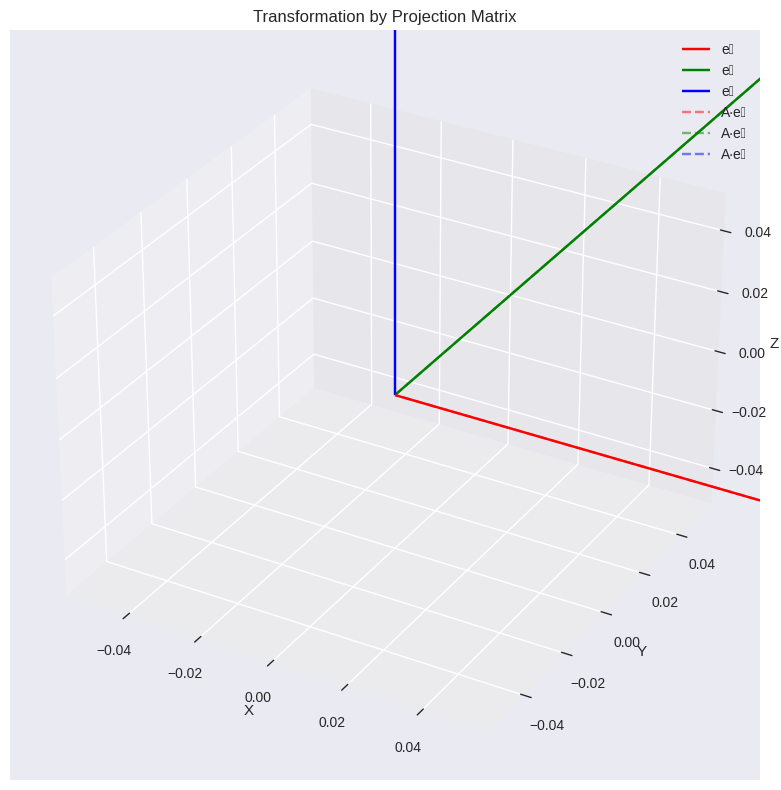

In [12]:

# Section 4: Matrix Representation of Linear Mappings

## 4.1 Linear Mappings as Matrices

# Matrix representation of the projection mapping F(x, y, z) = (x, y, 0)
def matrix_representation_projection():
    """Find the matrix representation of the projection mapping F(x, y, z) = (x, y, 0)"""
    # The matrix for this projection is:
    projection_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])

    print("Matrix Representation of the Projection Mapping F(x, y, z) = (x, y, 0):")
    print(f"A = \n{projection_matrix}")

    # Test with a vector
    v = np.array([3, 4, 5])
    result_matrix = projection_matrix @ v
    result_function = projection_xy(v)

    print(f"\nTest with vector v = {v}")
    print(f"Result using matrix: A * v = {result_matrix}")
    print(f"Result using function: F(v) = {result_function}")
    print(f"Are they equal? {np.allclose(result_matrix, result_function)}")

    return projection_matrix

projection_matrix = matrix_representation_projection()

# Visualize the projection matrix as a transformation
def visualize_matrix_transformation(matrix, title):
    """Visualize how a matrix transforms the standard basis vectors"""
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Standard basis vectors
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])

    # Transformed basis vectors
    t_e1 = matrix @ e1
    t_e2 = matrix @ e2
    t_e3 = matrix @ e3

    # Plot original basis vectors
    ax.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='r', arrow_length_ratio=0.1, label='e₁')
    ax.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='g', arrow_length_ratio=0.1, label='e₂')
    ax.quiver(0, 0, 0, e3[0], e3[1], e3[2], color='b', arrow_length_ratio=0.1, label='e₃')

    # Plot transformed basis vectors
    ax.quiver(0, 0, 0, t_e1[0], t_e1[1], t_e1[2], color='r', linestyle='--',
              arrow_length_ratio=0.1, alpha=0.5, label='A·e₁')
    ax.quiver(0, 0, 0, t_e2[0], t_e2[1], t_e2[2], color='g', linestyle='--',
              arrow_length_ratio=0.1, alpha=0.5, label='A·e₂')
    ax.quiver(0, 0, 0, t_e3[0], t_e3[1], t_e3[2], color='b', linestyle='--',
              arrow_length_ratio=0.1, alpha=0.5, label='A·e₃')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

    plt.tight_layout()
    plt.show()

visualize_matrix_transformation(projection_matrix, 'Transformation by Projection Matrix')


Finding the matrix of F(x, y) = (2x - y, x + 3y):
Standard basis vectors for ℝ²: e₁ = [1 0], e₂ = [0 1]
F(e₁) = F([1 0]) = [2 1]
F(e₂) = F([0 1]) = [-1  3]

Matrix A with columns F(e₁), F(e₂):
A = 
[[ 2 -1]
 [ 1  3]]

Test with vector v = [3 2]
Result using matrix: A · v = [4 9]
Result using function: F(v) = [4 9]
Are they equal? True


<ipython-input-13-b11603e7dc62>:88: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from font(s) Liberation Sans.
  plt.tight_layout()


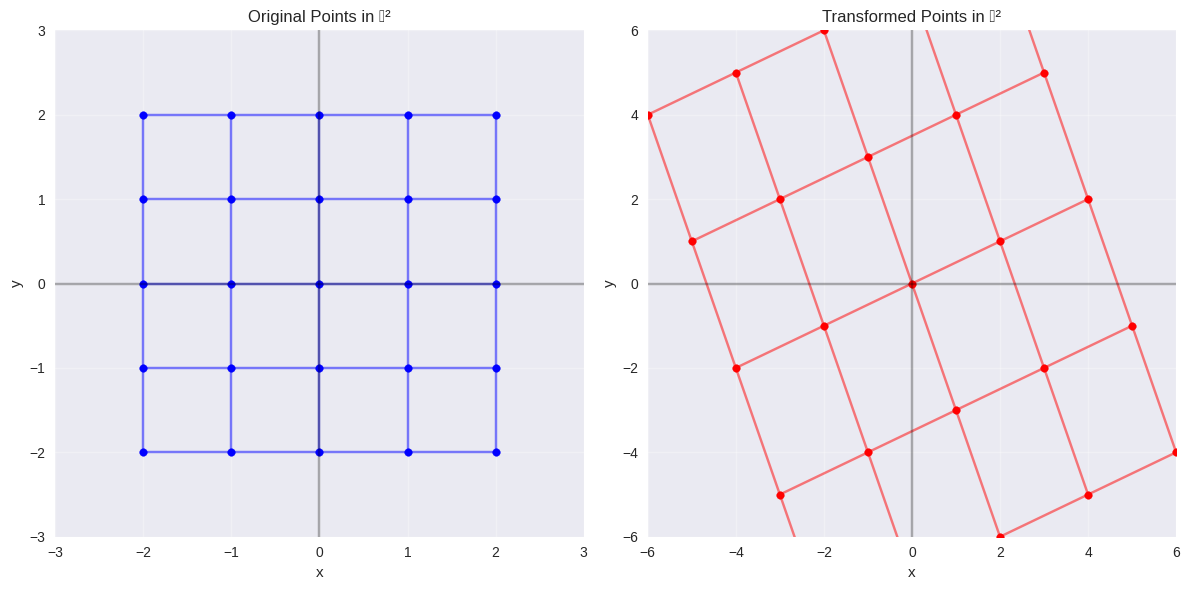

In [13]:

## 4.2 Finding Matrix of a Linear Mapping

def find_matrix_representation():
    """Find the matrix of a linear mapping F: ℝ² → ℝ² given by F(x, y) = (2x - y, x + 3y)"""
    # Define the linear mapping
    def F(v):
        x, y = v
        return np.array([2*x - y, x + 3*y])

    # Standard basis for ℝ²
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])

    # Find the images of the basis vectors
    F_e1 = F(e1)
    F_e2 = F(e2)

    # The matrix A has these images as its columns
    A = np.column_stack([F_e1, F_e2])

    print("Finding the matrix of F(x, y) = (2x - y, x + 3y):")
    print(f"Standard basis vectors for ℝ²: e₁ = {e1}, e₂ = {e2}")
    print(f"F(e₁) = F({e1}) = {F_e1}")
    print(f"F(e₂) = F({e2}) = {F_e2}")
    print(f"\nMatrix A with columns F(e₁), F(e₂):\nA = \n{A}")

    # Test with a vector
    v = np.array([3, 2])
    result_matrix = A @ v
    result_function = F(v)

    print(f"\nTest with vector v = {v}")
    print(f"Result using matrix: A · v = {result_matrix}")
    print(f"Result using function: F(v) = {result_function}")
    print(f"Are they equal? {np.allclose(result_matrix, result_function)}")

    return A

matrix_F = find_matrix_representation()

# Visualize the transformation
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

# Apply the transformation
transformed_points = np.array([matrix_F @ point for point in grid_points])

# Plot the transformation
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# Plot original grid
for i in range(len(x)):
    ax1.plot(X[i, :], Y[i, :], 'b-', alpha=0.5)
    ax1.plot(X[:, i], Y[:, i], 'b-', alpha=0.5)

ax1.scatter(grid_points[:, 0], grid_points[:, 1], c='blue', s=30)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Points in ℝ²')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot transformed grid
transformed_X = transformed_points[:, 0].reshape(X.shape)
transformed_Y = transformed_points[:, 1].reshape(Y.shape)

for i in range(len(x)):
    ax2.plot(transformed_X[i, :], transformed_Y[i, :], 'r-', alpha=0.5)
    ax2.plot(transformed_X[:, i], transformed_Y[:, i], 'r-', alpha=0.5)

ax2.scatter(transformed_points[:, 0], transformed_points[:, 1], c='red', s=30)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Transformed Points in ℝ²')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


Analysis of the nonsingular mapping F(x, y) = (x - y, x - 2y):
Matrix representation A =
[[ 1 -1]
 [ 1 -2]]
det(A) = -1.0
Is det(A) nonzero? True

To find the kernel, solve:
  x - y = 0
  x - 2y = 0
This gives the system:
  x = y
  x = 2y
These equations are consistent only if y = 0, which gives x = 0
So Ker F = {(0, 0)}, only the zero vector

Linearly dependent vectors in the domain:
v₁ = [1 1], v₂ = [2 2] where v₂ = 2v₁
F(v₁) = [ 0 -1]
F(v₂) = [ 0 -2]
Notice that F(v₂) = 2F(v₁), preserving the linear relationship


<ipython-input-14-ae840c478994>:103: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from font(s) Liberation Sans.
  plt.tight_layout()


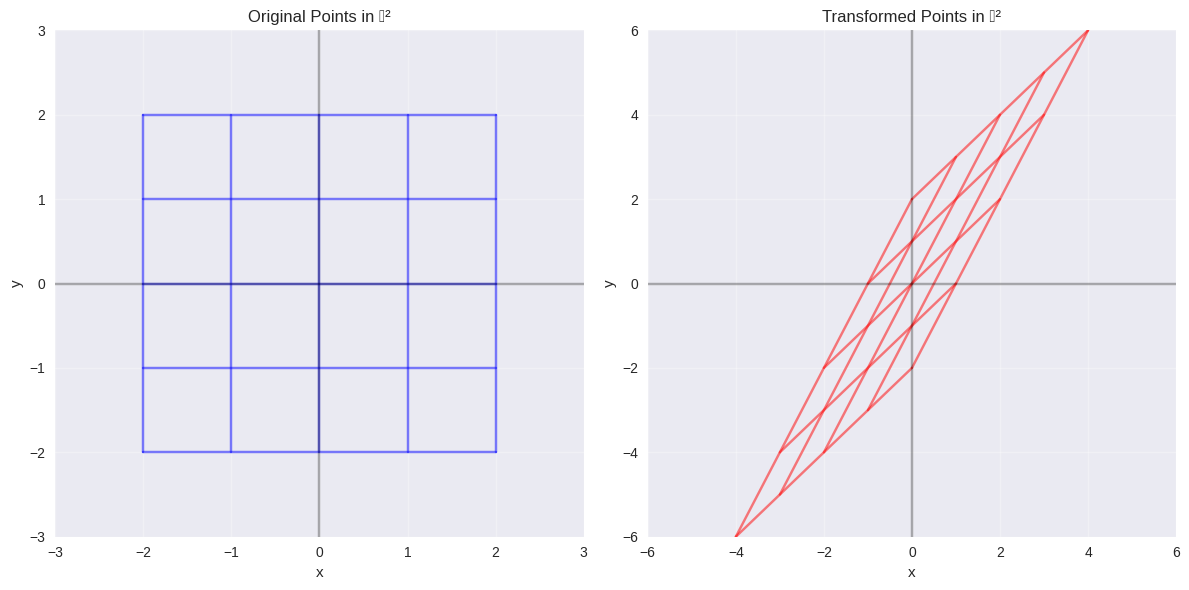

In [14]:

# Section 5: Singular and Nonsingular Linear Mappings

## 5.1 Nonsingular Linear Mappings

def analyze_nonsingular_mapping():
    """Analyze the nonsingular linear mapping F: ℝ² → ℝ² defined by F(x, y) = (x - y, x - 2y)"""
    # Define the linear mapping
    def F(v):
        x, y = v
        return np.array([x - y, x - 2*y])

    # Matrix representation
    A = np.array([[1, -1], [1, -2]])

    # Check determinant (nonzero for nonsingular mapping)
    det_A = np.linalg.det(A)

    # Find the kernel by solving Ax = 0
    # For a nonsingular mapping, this should be just the zero vector
    try:
        kernel_basis = linalg.null_space(A)
        is_kernel_zero = kernel_basis.size == 0
    except:
        # If there's no nontrivial solution, the kernel is {0}
        is_kernel_zero = True

    print("Analysis of the nonsingular mapping F(x, y) = (x - y, x - 2y):")
    print(f"Matrix representation A =\n{A}")
    print(f"det(A) = {det_A}")
    print(f"Is det(A) nonzero? {det_A != 0}")

    # Find the kernel by solving the system of equations
    print("\nTo find the kernel, solve:")
    print("  x - y = 0")
    print("  x - 2y = 0")
    print("This gives the system:")
    print("  x = y")
    print("  x = 2y")
    print("These equations are consistent only if y = 0, which gives x = 0")
    print("So Ker F = {(0, 0)}, only the zero vector")

    # Test with vectors
    v1 = np.array([1, 1])
    v2 = np.array([2, 2])
    F_v1 = F(v1)
    F_v2 = F(v2)

    print("\nLinearly dependent vectors in the domain:")
    print(f"v₁ = {v1}, v₂ = {v2} where v₂ = 2v₁")
    print(f"F(v₁) = {F_v1}")
    print(f"F(v₂) = {F_v2}")
    print(f"Notice that F(v₂) = 2F(v₁), preserving the linear relationship")

    return A

nonsingular_matrix = analyze_nonsingular_mapping()

# Visualize the nonsingular transformation
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# Create a grid of points
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

# Apply the transformation
transformed_points = np.array([nonsingular_matrix @ point for point in grid_points])

# Plot original grid
for i in range(len(x)):
    ax1.plot(X[i, :], Y[i, :], 'b-', alpha=0.5)
    ax1.plot(X[:, i], Y[:, i], 'b-', alpha=0.5)

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Points in ℝ²')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot transformed grid
transformed_X = transformed_points[:, 0].reshape(X.shape)
transformed_Y = transformed_points[:, 1].reshape(Y.shape)

for i in range(len(x)):
    ax2.plot(transformed_X[i, :], transformed_Y[i, :], 'r-', alpha=0.5)
    ax2.plot(transformed_X[:, i], transformed_Y[:, i], 'r-', alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Transformed Points in ℝ²')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


Analysis of the singular mapping G(x, y) = (2x - 4y, 3x - 6y):
Matrix representation A =
[[ 2 -4]
 [ 3 -6]]
det(A) = 0.0
Is det(A) zero? True

To find the kernel, solve:
  2x - 4y = 0
  3x - 6y = 0
This gives us:
  x = 2y (from first equation)
  3(2y) - 6y = 0 (substituting into second)
  6y - 6y = 0 (which is always true)
So Ker G = {(2t, t) : t ∈ ℝ}, a one-dimensional subspace

Some vectors in the kernel:
For t = -1: v = (-2, -1), G(v) = [0 0]
For t = 0: v = (0, 0), G(v) = [0 0]
For t = 1: v = (2, 1), G(v) = [0 0]
For t = 2: v = (4, 2), G(v) = [0 0]

Rank of A = 1, meaning dim(Im G) = 1
Since the rank is 1, the image is a one-dimensional subspace of ℝ²
All outputs of G have the form (2t, 3t) for some scalar t
This is because:
  G(x, y) = (2x - 4y, 3x - 6y)
  = (2(x - 2y), 3(x - 2y))
  = (x - 2y) · (2, 3)
So Im G = {t·(2, 3) : t ∈ ℝ}, a line through the origin


<ipython-input-15-327f2b0d8a4f>:135: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from font(s) Liberation Sans.
  plt.tight_layout()


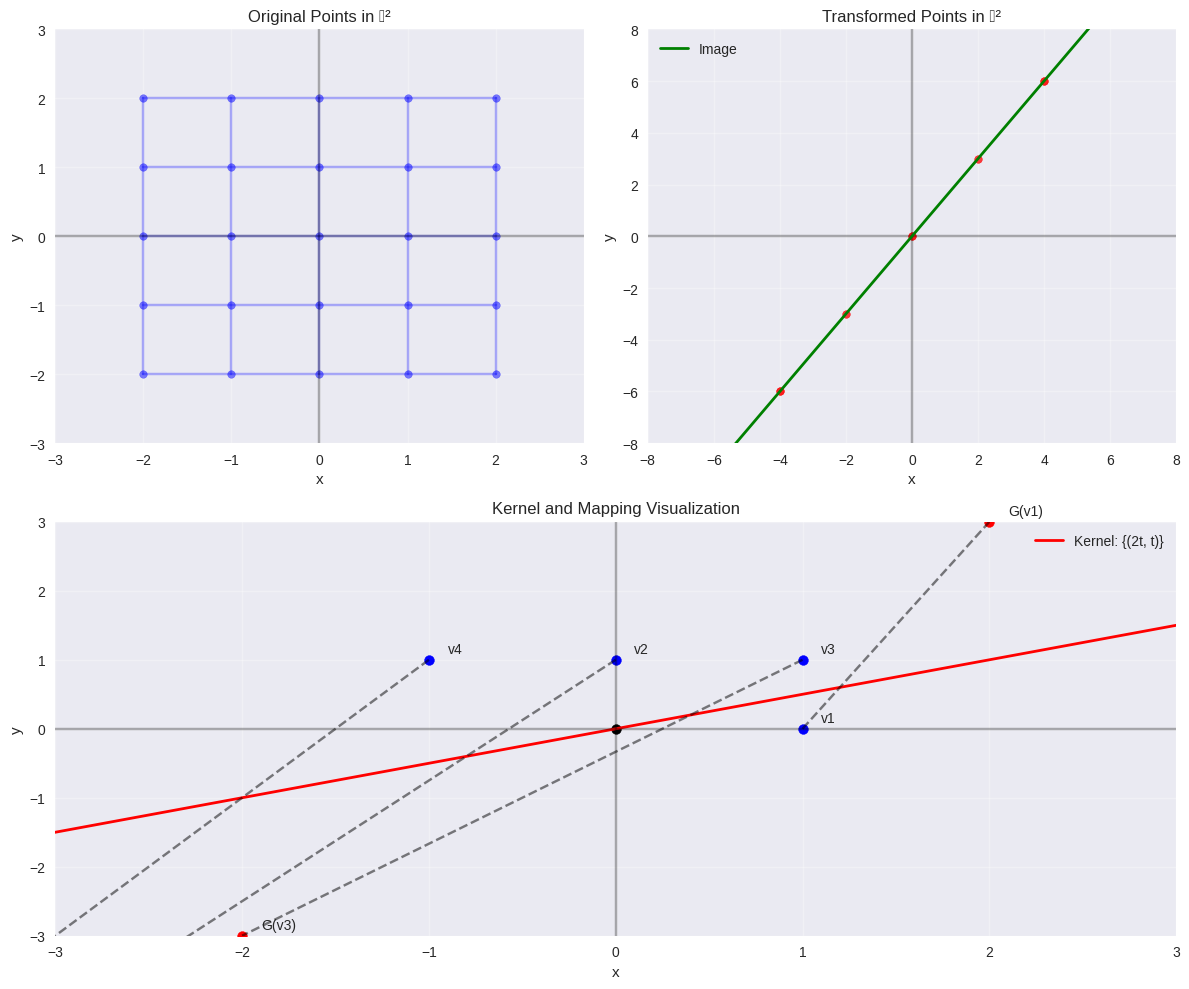

In [15]:

## 5.2 Singular Linear Mappings

def analyze_singular_mapping():
    """Analyze the singular linear mapping G: ℝ² → ℝ² defined by G(x, y) = (2x - 4y, 3x - 6y)"""
    # Define the linear mapping
    def G(v):
        x, y = v
        return np.array([2*x - 4*y, 3*x - 6*y])

    # Matrix representation
    A = np.array([[2, -4], [3, -6]])

    # Check determinant (zero for singular mapping)
    det_A = np.linalg.det(A)

    # Find the kernel
    kernel_basis = linalg.null_space(A)

    print("Analysis of the singular mapping G(x, y) = (2x - 4y, 3x - 6y):")
    print(f"Matrix representation A =\n{A}")
    print(f"det(A) = {det_A}")
    print(f"Is det(A) zero? {np.allclose(det_A, 0)}")

    # Find the kernel by solving the system of equations
    print("\nTo find the kernel, solve:")
    print("  2x - 4y = 0")
    print("  3x - 6y = 0")
    print("This gives us:")
    print("  x = 2y (from first equation)")
    print("  3(2y) - 6y = 0 (substituting into second)")
    print("  6y - 6y = 0 (which is always true)")
    print("So Ker G = {(2t, t) : t ∈ ℝ}, a one-dimensional subspace")

    # Show some vectors in the kernel
    t_values = [-1, 0, 1, 2]
    kernel_vectors = [(2*t, t) for t in t_values]
    print("\nSome vectors in the kernel:")
    for t, v in zip(t_values, kernel_vectors):
        print(f"For t = {t}: v = {v}, G(v) = {G(np.array(v))}")

    # Find the dimension of the image
    rank = np.linalg.matrix_rank(A)
    print(f"\nRank of A = {rank}, meaning dim(Im G) = {rank}")
    print(f"Since the rank is 1, the image is a one-dimensional subspace of ℝ²")

    # Find the image
    print("All outputs of G have the form (2t, 3t) for some scalar t")
    print("This is because:")
    print("  G(x, y) = (2x - 4y, 3x - 6y)")
    print("  = (2(x - 2y), 3(x - 2y))")
    print("  = (x - 2y) · (2, 3)")
    print("So Im G = {t·(2, 3) : t ∈ ℝ}, a line through the origin")

    return A, kernel_basis

singular_matrix, kernel_basis = analyze_singular_mapping()

# Visualize the singular transformation
plt.figure(figsize=(12, 10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212)

# Create a grid of points
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

# Apply the transformation
transformed_points = np.array([singular_matrix @ point for point in grid_points])

# Plot original grid
for i in range(len(x)):
    ax1.plot(X[i, :], Y[i, :], 'b-', alpha=0.3)
    ax1.plot(X[:, i], Y[:, i], 'b-', alpha=0.3)

ax1.scatter(grid_points[:, 0], grid_points[:, 1], c='blue', s=30, alpha=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Points in ℝ²')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot transformed grid
ax2.scatter(transformed_points[:, 0], transformed_points[:, 1], c='red', s=30, alpha=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Transformed Points in ℝ²')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-8, 8)
ax2.set_ylim(-8, 8)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Draw a line representing the image
t = np.linspace(-3, 3, 100)
image_line_x = 2 * t
image_line_y = 3 * t
ax2.plot(image_line_x, image_line_y, 'g-', linewidth=2, label='Image')
ax2.legend()

# Visualize the kernel
kernel_t = np.linspace(-2, 2, 100)
kernel_x = 2 * kernel_t
kernel_y = kernel_t

ax3.plot(kernel_x, kernel_y, 'r-', linewidth=2, label='Kernel: {(2t, t)}')
ax3.scatter(0, 0, c='k', s=50)

# Also plot some original grid points and their images
sample_points = np.array([[1, 0], [0, 1], [1, 1], [-1, 1]])
sample_transformed = np.array([singular_matrix @ p for p in sample_points])

for i, (p, tp) in enumerate(zip(sample_points, sample_transformed)):
    ax3.scatter(p[0], p[1], c='blue', s=50)
    ax3.scatter(tp[0], tp[1], c='red', s=50)
    ax3.annotate(f'v{i+1}', p, xytext=(p[0]+0.1, p[1]+0.1))
    ax3.annotate(f'G(v{i+1})', tp, xytext=(tp[0]+0.1, tp[1]+0.1))
    ax3.plot([p[0], tp[0]], [p[1], tp[1]], 'k--', alpha=0.5)

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Kernel and Mapping Visualization')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-3, 3)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()


Analysis of the mapping F(x, y) = (3x + 2y, x + y):
Matrix representation A =
[[3 2]
 [1 1]]
det(A) = 1.0000000000000002
Is F an isomorphism? True

Inverse matrix A⁻¹ =
[[ 1. -2.]
 [-1.  3.]]
This means the inverse mapping F⁻¹(u, v) is given by:
F⁻¹(u, v) = (0.9999999999999998u + -1.9999999999999996v, -0.9999999999999998u + 2.9999999999999996v)

Test with vector v = [2 3]
F(v) = w = [12  5]
F⁻¹(w) = [2. 3.]
Is F⁻¹(F(v)) = v? True


<ipython-input-16-e108e912ae84>:107: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from font(s) Liberation Sans.
  plt.tight_layout()
<ipython-input-16-e108e912ae84>:107: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


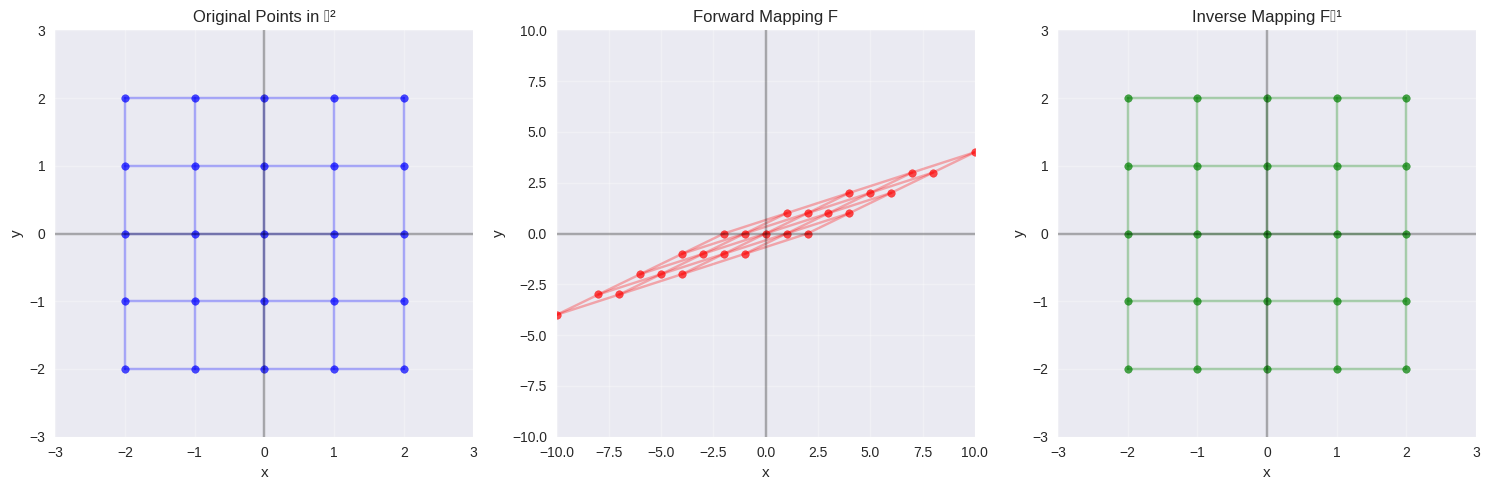

In [16]:

## 5.3 Isomorphisms

def analyze_isomorphism():
    """Analyze the isomorphism F: ℝ² → ℝ² defined by F(x, y) = (3x + 2y, x + y)"""
    # Matrix representation
    A = np.array([[3, 2], [1, 1]])

    # Check if it's an isomorphism
    det_A = np.linalg.det(A)
    is_isomorphism = det_A != 0

    # Find the inverse mapping if it exists
    if is_isomorphism:
        A_inv = np.linalg.inv(A)

    print("Analysis of the mapping F(x, y) = (3x + 2y, x + y):")
    print(f"Matrix representation A =\n{A}")
    print(f"det(A) = {det_A}")
    print(f"Is F an isomorphism? {is_isomorphism}")

    if is_isomorphism:
        print(f"\nInverse matrix A⁻¹ =\n{A_inv}")
        print("This means the inverse mapping F⁻¹(u, v) is given by:")
        print(f"F⁻¹(u, v) = ({A_inv[0, 0]}u + {A_inv[0, 1]}v, {A_inv[1, 0]}u + {A_inv[1, 1]}v)")

        # Test with a vector
        v = np.array([2, 3])
        w = A @ v
        v_recovered = A_inv @ w

        print(f"\nTest with vector v = {v}")
        print(f"F(v) = w = {w}")
        print(f"F⁻¹(w) = {v_recovered}")
        print(f"Is F⁻¹(F(v)) = v? {np.allclose(v_recovered, v)}")

    return A, A_inv if is_isomorphism else None

iso_matrix, iso_inverse = analyze_isomorphism()

# Visualize the isomorphism
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

# Create a grid of points
x = np.linspace(-2, 2, 5)
y = np.linspace(-2, 2, 5)
X, Y = np.meshgrid(x, y)
grid_points = np.column_stack([X.ravel(), Y.ravel()])

# Apply the forward and inverse transformations
forward_points = np.array([iso_matrix @ point for point in grid_points])
inverse_points = np.array([iso_inverse @ fp for fp in forward_points])

# Plot original grid
for i in range(len(x)):
    ax1.plot(X[i, :], Y[i, :], 'b-', alpha=0.3)
    ax1.plot(X[:, i], Y[:, i], 'b-', alpha=0.3)

ax1.scatter(grid_points[:, 0], grid_points[:, 1], c='blue', s=30, alpha=0.7)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Original Points in ℝ²')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot transformed grid
transformed_X = forward_points[:, 0].reshape(X.shape)
transformed_Y = forward_points[:, 1].reshape(Y.shape)

for i in range(len(x)):
    ax2.plot(transformed_X[i, :], transformed_Y[i, :], 'r-', alpha=0.3)
    ax2.plot(transformed_X[:, i], transformed_Y[:, i], 'r-', alpha=0.3)

ax2.scatter(forward_points[:, 0], forward_points[:, 1], c='red', s=30, alpha=0.7)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Forward Mapping F')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-10, 10)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot inverse-transformed grid
inverse_X = inverse_points[:, 0].reshape(X.shape)
inverse_Y = inverse_points[:, 1].reshape(Y.shape)

for i in range(len(x)):
    ax3.plot(inverse_X[i, :], inverse_Y[i, :], 'g-', alpha=0.3)
    ax3.plot(inverse_X[:, i], inverse_Y[:, i], 'g-', alpha=0.3)

ax3.scatter(inverse_points[:, 0], inverse_points[:, 1], c='green', s=30, alpha=0.7)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('Inverse Mapping F⁻¹')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-3, 3)
ax3.set_ylim(-3, 3)
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()


In [17]:

# Section 6: Operations with Linear Mappings

## 6.1 Addition and Scalar Multiplication

def demonstrate_operations():
    """Demonstrate addition and scalar multiplication of linear mappings"""
    # Define two linear mappings
    def F(v):
        """Linear mapping F(x, y, z) = (x, y+z)"""
        x, y, z = v
        return np.array([x, y+z])

    def G(v):
        """Linear mapping G(x, y, z) = (y, x-z)"""
        x, y, z = v
        return np.array([y, x-z])

    # Define their sum F + G
    def F_plus_G(v):
        """Sum (F + G)(x, y, z) = (x+y, y+z+x-z) = (x+y, x+y)"""
        return F(v) + G(v)

    # Define scalar multiple 2F
    def two_F(v):
        """Scalar multiple (2F)(x, y, z) = (2x, 2y+2z)"""
        return 2 * F(v)

    # Test with a vector
    v = np.array([1, 2, 3])

    print("Operations with Linear Mappings:")
    print(f"Vector v = {v}")
    print(f"F(v) = {F(v)}")
    print(f"G(v) = {G(v)}")
    print(f"(F + G)(v) = {F_plus_G(v)}")
    print(f"(2F)(v) = {two_F(v)}")

    # Matrix representations
    F_matrix = np.array([[1, 0, 0], [0, 1, 1]])
    G_matrix = np.array([[0, 1, 0], [1, 0, -1]])

    print("\nMatrix representations:")
    print(f"Matrix of F =\n{F_matrix}")
    print(f"Matrix of G =\n{G_matrix}")
    print(f"Matrix of F + G =\n{F_matrix + G_matrix}")
    print(f"Matrix of 2F =\n{2 * F_matrix}")

    # Verify with matrix multiplication
    print("\nVerification with matrices:")
    print(f"F(v) using matrix: {F_matrix @ v}")
    print(f"G(v) using matrix: {G_matrix @ v}")
    print(f"(F + G)(v) using matrix: {(F_matrix + G_matrix) @ v}")
    print(f"(2F)(v) using matrix: {(2 * F_matrix) @ v}")

demonstrate_operations()


Operations with Linear Mappings:
Vector v = [1 2 3]
F(v) = [1 5]
G(v) = [ 2 -2]
(F + G)(v) = [3 3]
(2F)(v) = [ 2 10]

Matrix representations:
Matrix of F =
[[1 0 0]
 [0 1 1]]
Matrix of G =
[[ 0  1  0]
 [ 1  0 -1]]
Matrix of F + G =
[[1 1 0]
 [1 1 0]]
Matrix of 2F =
[[2 0 0]
 [0 2 2]]

Verification with matrices:
F(v) using matrix: [1 5]
G(v) using matrix: [ 2 -2]
(F + G)(v) using matrix: [3 3]
(2F)(v) using matrix: [ 2 10]


In [18]:

## 6.2 Composition of Linear Mappings

def demonstrate_composition():
    """Demonstrate composition of linear mappings"""
    # Define two linear mappings
    def F(v):
        """Linear mapping F: ℝ² → ℝ² defined by F(x, y) = (x+y, 0)"""
        x, y = v
        return np.array([x+y, 0])

    def G(v):
        """Linear mapping G: ℝ² → ℝ² defined by G(x, y) = (y, x)"""
        x, y = v
        return np.array([y, x])

    # Define their compositions
    def G_of_F(v):
        """Composition (G ∘ F)(x, y) = G(F(x, y))"""
        return G(F(v))

    def F_of_G(v):
        """Composition (F ∘ G)(x, y) = F(G(x, y))"""
        return F(G(v))

    # Test with a vector
    v = np.array([2, 3])

    print("Composition of Linear Mappings:")
    print(f"Vector v = {v}")
    print(f"F(v) = {F(v)}")
    print(f"G(v) = {G(v)}")
    print(f"(G ∘ F)(v) = G(F(v)) = G({F(v)}) = {G_of_F(v)}")
    print(f"(F ∘ G)(v) = F(G(v)) = F({G(v)}) = {F_of_G(v)}")

    # Matrix representations
    F_matrix = np.array([[1, 1], [0, 0]])
    G_matrix = np.array([[0, 1], [1, 0]])

    print("\nMatrix representations:")
    print(f"Matrix of F =\n{F_matrix}")
    print(f"Matrix of G =\n{G_matrix}")
    print(f"Matrix of G ∘ F = G·F =\n{G_matrix @ F_matrix}")
    print(f"Matrix of F ∘ G = F·G =\n{F_matrix @ G_matrix}")

    # Verify with matrix multiplication
    print("\nVerification with matrices:")
    print(f"F(v) using matrix: {F_matrix @ v}")
    print(f"G(v) using matrix: {G_matrix @ v}")
    print(f"(G ∘ F)(v) using matrix: {(G_matrix @ F_matrix) @ v}")
    print(f"(F ∘ G)(v) using matrix: {(F_matrix @ G_matrix) @ v}")

    # Verify distributive property: G ∘ (F₁ + F₂) = G ∘ F₁ + G ∘ F₂
    def F2(v):
        """Another linear mapping F₂: ℝ² → ℝ² defined by F₂(x, y) = (x, 2y)"""
        x, y = v
        return np.array([x, 2*y])

    F2_matrix = np.array([[1, 0], [0, 2]])

    print("\nDistributive Property:")
    print(f"G ∘ (F + F₂) using matrices: {G_matrix @ (F_matrix + F2_matrix)}")
    print(f"(G ∘ F) + (G ∘ F₂) using matrices: {(G_matrix @ F_matrix) + (G_matrix @ F2_matrix)}")
    print(f"Are they equal? {np.allclose(G_matrix @ (F_matrix + F2_matrix), (G_matrix @ F_matrix) + (G_matrix @ F2_matrix))}")

demonstrate_composition()


Composition of Linear Mappings:
Vector v = [2 3]
F(v) = [5 0]
G(v) = [3 2]
(G ∘ F)(v) = G(F(v)) = G([5 0]) = [0 5]
(F ∘ G)(v) = F(G(v)) = F([3 2]) = [5 0]

Matrix representations:
Matrix of F =
[[1 1]
 [0 0]]
Matrix of G =
[[0 1]
 [1 0]]
Matrix of G ∘ F = G·F =
[[0 0]
 [1 1]]
Matrix of F ∘ G = F·G =
[[1 1]
 [0 0]]

Verification with matrices:
F(v) using matrix: [5 0]
G(v) using matrix: [3 2]
(G ∘ F)(v) using matrix: [0 5]
(F ∘ G)(v) using matrix: [5 0]

Distributive Property:
G ∘ (F + F₂) using matrices: [[0 2]
 [2 1]]
(G ∘ F) + (G ∘ F₂) using matrices: [[0 2]
 [2 1]]
Are they equal? True


In [19]:

# Section 7: Algebra of Linear Operators

## 7.1 Linear Operators and Invertible Operators

def demonstrate_operators():
    """Demonstrate linear operators and invertible operators"""
    # Define a linear operator
    def T(v):
        """Linear operator T: ℝ² → ℝ² defined by T(x, y) = (2x + y, 3x + 4y)"""
        x, y = v
        return np.array([2*x + y, 3*x + 4*y])

    # Matrix representation
    T_matrix = np.array([[2, 1], [3, 4]])

    # Check if T is invertible
    det_T = np.linalg.det(T_matrix)
    is_invertible = det_T != 0

    # Find the inverse if it exists
    if is_invertible:
        T_inv_matrix = np.linalg.inv(T_matrix)

        def T_inv(v):
            """Inverse operator T⁻¹: ℝ² → ℝ² defined by matrix inverse"""
            return T_inv_matrix @ v

    print("Linear Operators:")
    print(f"Matrix of T =\n{T_matrix}")
    print(f"det(T) = {det_T}")
    print(f"Is T invertible? {is_invertible}")

    if is_invertible:
        print(f"\nInverse matrix T⁻¹ =\n{T_inv_matrix}")

        # Test with a vector
        v = np.array([1, 2])
        w = T(v)
        v_recovered = T_inv(w)

        print(f"\nTest with vector v = {v}")
        print(f"T(v) = {w}")
        print(f"T⁻¹(T(v)) = {v_recovered}")
        print(f"Is T⁻¹(T(v)) = v? {np.allclose(v_recovered, v)}")

        # Verify T ∘ T⁻¹ = T⁻¹ ∘ T = I
        identity = np.eye(2)
        print(f"\nT ∘ T⁻¹ = T·T⁻¹ =\n{T_matrix @ T_inv_matrix}")
        print(f"T⁻¹ ∘ T = T⁻¹·T =\n{T_inv_matrix @ T_matrix}")
        print(f"Identity matrix I =\n{identity}")
        print(f"Is T·T⁻¹ = I? {np.allclose(T_matrix @ T_inv_matrix, identity)}")
        print(f"Is T⁻¹·T = I? {np.allclose(T_inv_matrix @ T_matrix, identity)}")

    return T_matrix, T_inv_matrix if is_invertible else None

T_matrix, T_inv_matrix = demonstrate_operators()


Linear Operators:
Matrix of T =
[[2 1]
 [3 4]]
det(T) = 5.000000000000001
Is T invertible? True

Inverse matrix T⁻¹ =
[[ 0.8 -0.2]
 [-0.6  0.4]]

Test with vector v = [1 2]
T(v) = [ 4 11]
T⁻¹(T(v)) = [1. 2.]
Is T⁻¹(T(v)) = v? True

T ∘ T⁻¹ = T·T⁻¹ =
[[1. 0.]
 [0. 1.]]
T⁻¹ ∘ T = T⁻¹·T =
[[ 1.  0.]
 [-0.  1.]]
Identity matrix I =
[[1. 0.]
 [0. 1.]]
Is T·T⁻¹ = I? True
Is T⁻¹·T = I? True


In [20]:

## 7.2 Polynomials of Operators

def demonstrate_operator_polynomials():
    """Demonstrate polynomials of linear operators"""
    # Define a linear operator T: ℝ² → ℝ² by T(x, y) = (y, x)
    T_matrix = np.array([[0, 1], [1, 0]])

    # Compute powers of T
    T_squared = T_matrix @ T_matrix
    T_cubed = T_matrix @ T_squared

    print("Polynomials of Operators:")
    print(f"Matrix of T =\n{T_matrix}")
    print(f"T² =\n{T_squared}")
    print(f"T³ =\n{T_cubed}")

    # Define a polynomial p(t) = t² - 1
    print("\nPolynomial p(t) = t² - 1:")
    identity = np.eye(2)
    p_T = T_squared - identity

    print(f"p(T) = T² - I =\n{p_T}")
    print(f"Is p(T) = 0? {np.allclose(p_T, np.zeros((2, 2)))}")
    print("This means T is a zero of the polynomial p(t) = t² - 1")

    # Verify with a vector
    v = np.array([3, 4])

    print(f"\nTest with vector v = {v}")
    print(f"T(v) = {T_matrix @ v}")
    print(f"T²(v) = {T_squared @ v}")
    print(f"p(T)(v) = (T² - I)(v) = {p_T @ v}")

demonstrate_operator_polynomials()


Polynomials of Operators:
Matrix of T =
[[0 1]
 [1 0]]
T² =
[[1 0]
 [0 1]]
T³ =
[[0 1]
 [1 0]]

Polynomial p(t) = t² - 1:
p(T) = T² - I =
[[0. 0.]
 [0. 0.]]
Is p(T) = 0? True
This means T is a zero of the polynomial p(t) = t² - 1

Test with vector v = [3 4]
T(v) = [4 3]
T²(v) = [3 4]
p(T)(v) = (T² - I)(v) = [0. 0.]


Neural Network Layer as Linear Transformation:
Input data X (shape (4, 3)):
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Weight matrix W (shape (4, 3)):
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]
 [1.  1.1 1.2]]
Bias vector b (shape (4,)):
[0.1 0.2 0.3 0.4]

Linear transformation Z = X·W^T + b (shape (4, 4)):
[[ 1.5  3.4  5.3  7.2]
 [ 3.3  7.9 12.5 17.1]
 [ 5.1 12.4 19.7 27. ]
 [ 6.9 16.9 26.9 36.9]]

After activation A = ReLU(Z) (shape (4, 4)):
[[ 1.5  3.4  5.3  7.2]
 [ 3.3  7.9 12.5 17.1]
 [ 5.1 12.4 19.7 27. ]
 [ 6.9 16.9 26.9 36.9]]


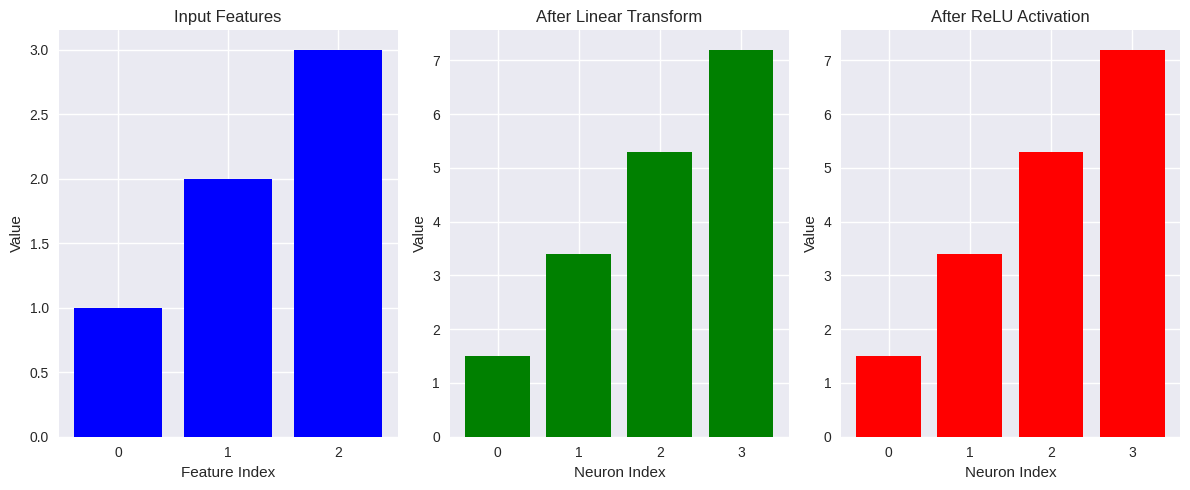


Two-Layer Neural Network:
First layer weights W1 (shape (4, 3)):
[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]
 [1.  1.1 1.2]]
First layer bias b1 (shape (4,)):
[0.1 0.2 0.3 0.4]
Second layer weights W2 (shape (2, 4)):
[[0.1 0.2 0.3 0.4]
 [0.5 0.6 0.7 0.8]]
Second layer bias b2 (shape (2,)):
[0.1 0.2]

Network output (shape (4, 2)):
[[ 5.4  12.46]
 [12.6  29.02]
 [19.8  45.58]
 [27.   62.14]]


In [21]:

# Section 8: Applications to Machine Learning

## 8.1 Linear Transformations in Neural Networks

def demonstrate_neural_network_layer():
    """Demonstrate a single layer of a neural network as a linear transformation followed by non-linearity"""
    # Create some input data
    X = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12]])

    # Define weight matrix and bias
    W = np.array([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9],
                  [1.0, 1.1, 1.2]])

    b = np.array([0.1, 0.2, 0.3, 0.4])

    # Define activation function (ReLU)
    def relu(x):
        return np.maximum(0, x)

    # Linear transformation
    Z = X @ W.T + b

    # Apply non-linearity
    A = relu(Z)

    print("Neural Network Layer as Linear Transformation:")
    print(f"Input data X (shape {X.shape}):\n{X}")
    print(f"Weight matrix W (shape {W.shape}):\n{W}")
    print(f"Bias vector b (shape {b.shape}):\n{b}")
    print(f"\nLinear transformation Z = X·W^T + b (shape {Z.shape}):\n{Z}")
    print(f"\nAfter activation A = ReLU(Z) (shape {A.shape}):\n{A}")

    # Visualize the transformation for a single sample
    plt.figure(figsize=(12, 5))

    # Original features
    plt.subplot(131)
    plt.bar(range(X.shape[1]), X[0], color='blue')
    plt.title('Input Features')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    plt.xticks(range(X.shape[1]))

    # After linear transformation
    plt.subplot(132)
    plt.bar(range(Z.shape[1]), Z[0], color='green')
    plt.title('After Linear Transform')
    plt.xlabel('Neuron Index')
    plt.ylabel('Value')
    plt.xticks(range(Z.shape[1]))

    # After activation
    plt.subplot(133)
    plt.bar(range(A.shape[1]), A[0], color='red')
    plt.title('After ReLU Activation')
    plt.xlabel('Neuron Index')
    plt.ylabel('Value')
    plt.xticks(range(A.shape[1]))

    plt.tight_layout()
    plt.show()

    # Implement a simple 2-layer neural network
    def simple_nn(X, W1, b1, W2, b2):
        # First layer
        Z1 = X @ W1.T + b1
        A1 = relu(Z1)

        # Second layer
        Z2 = A1 @ W2.T + b2

        return Z2

    # Define second layer weights and bias
    W2 = np.array([[0.1, 0.2, 0.3, 0.4],
                  [0.5, 0.6, 0.7, 0.8]])

    b2 = np.array([0.1, 0.2])

    # Forward pass
    output = simple_nn(X, W, b, W2, b2)

    print("\nTwo-Layer Neural Network:")
    print(f"First layer weights W1 (shape {W.shape}):\n{W}")
    print(f"First layer bias b1 (shape {b.shape}):\n{b}")
    print(f"Second layer weights W2 (shape {W2.shape}):\n{W2}")
    print(f"Second layer bias b2 (shape {b2.shape}):\n{b2}")
    print(f"\nNetwork output (shape {output.shape}):\n{output}")

demonstrate_neural_network_layer()


Principal Component Analysis (PCA) Demonstration:
Original data shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First few rows of the data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

PCA explained variance ratio: [0.73  0.229]
Total variance explained: 0.96

Principal components (eigenvectors):
[[ 0.521 -0.269  0.58   0.565]
 [ 0.377  0.923  0.024  0.067]]


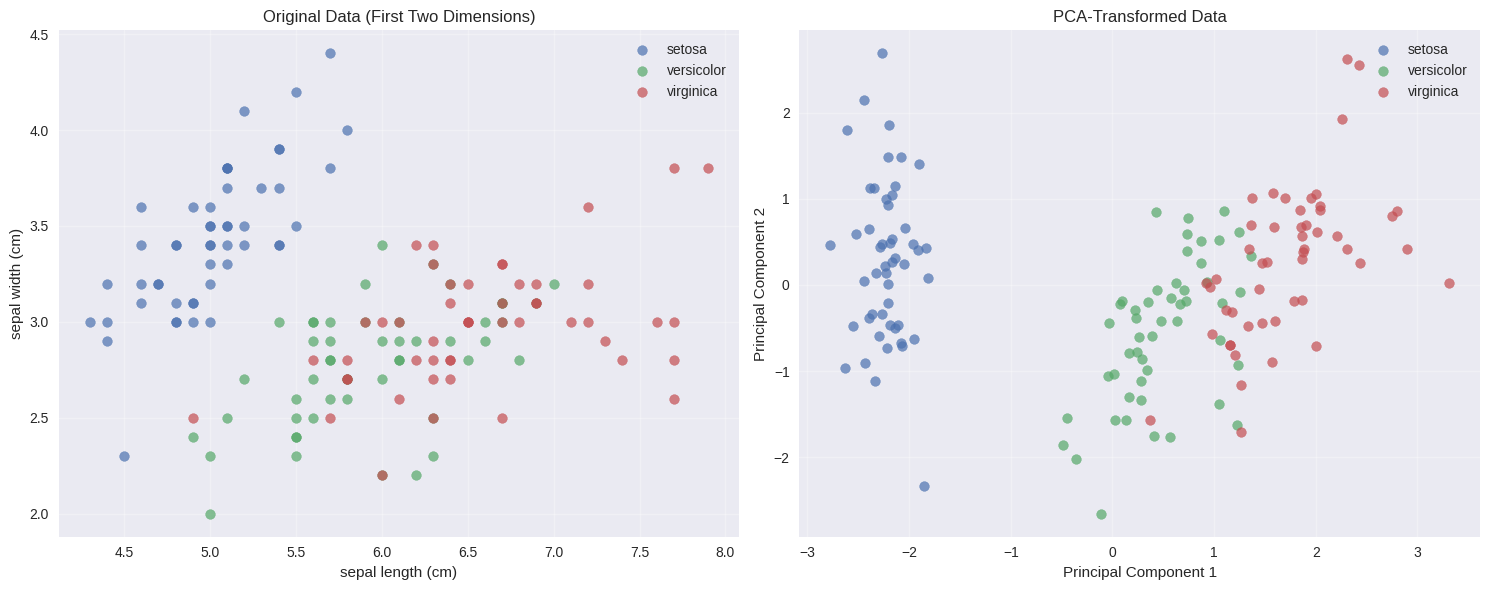

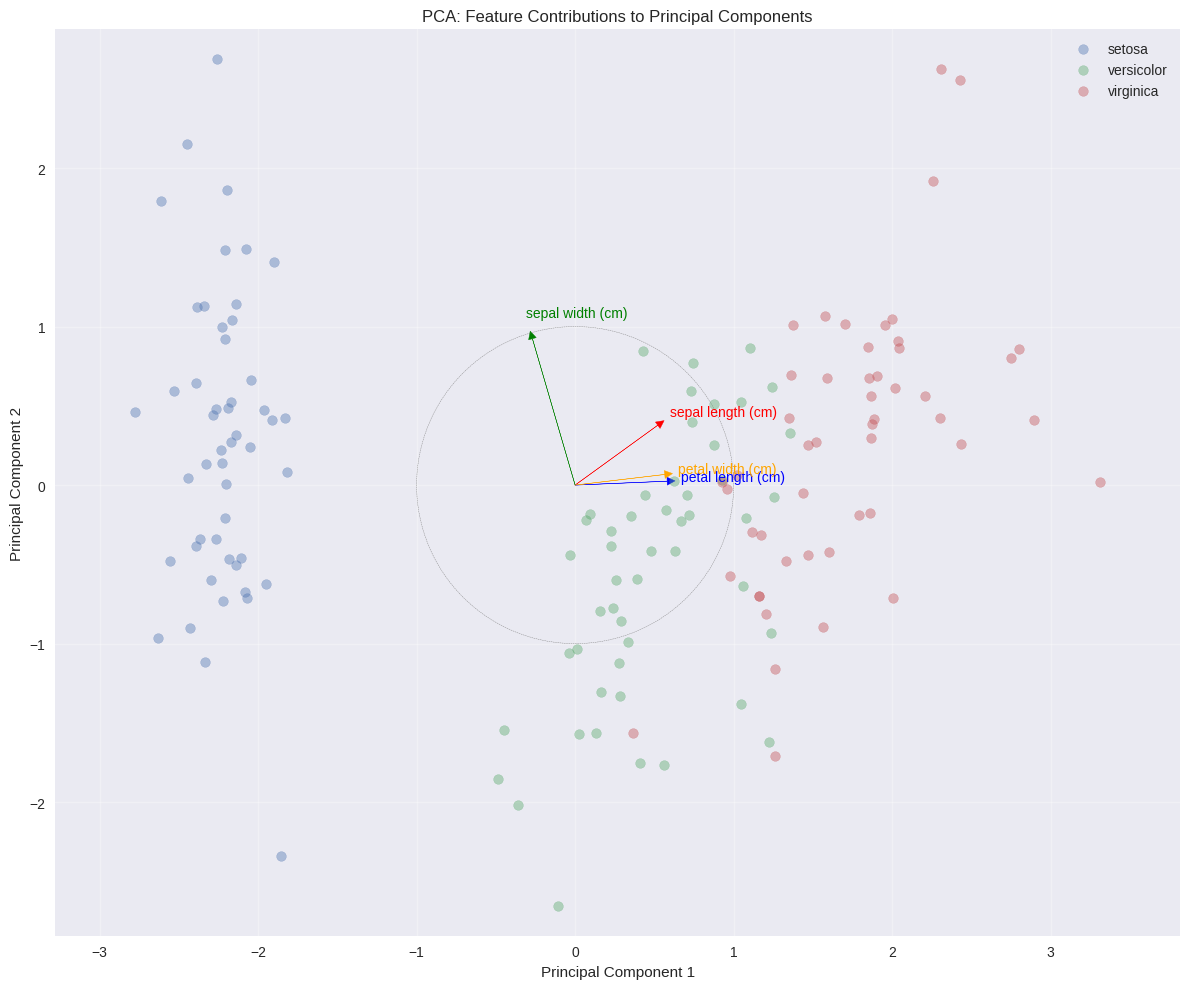

In [22]:

## 8.2 Principal Component Analysis (PCA)

def demonstrate_pca():
    """Demonstrate PCA as a linear mapping for dimensionality reduction"""
    # Load iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names

    # Create a DataFrame for easier visualization
    df = pd.DataFrame(X, columns=feature_names)
    df['species'] = [iris.target_names[i] for i in y]

    print("Principal Component Analysis (PCA) Demonstration:")
    print(f"Original data shape: {X.shape}")
    print(f"Feature names: {feature_names}")
    print(f"First few rows of the data:\n{df.head()}")

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Create a DataFrame for PCA results
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_pca['species'] = df['species']

    print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2f}")

    # Get the principal components (eigenvectors)
    components = pca.components_

    print(f"\nPrincipal components (eigenvectors):\n{components}")

    # Visualize PCA components as linear transformations
    plt.figure(figsize=(15, 6))

    # Plot the original data in 2D
    ax1 = plt.subplot(121)
    for i, species in enumerate(iris.target_names):
        subset = df[df['species'] == species]
        ax1.scatter(subset[feature_names[0]], subset[feature_names[1]],
                   label=species, alpha=0.7)

    ax1.set_xlabel(feature_names[0])
    ax1.set_ylabel(feature_names[1])
    ax1.set_title('Original Data (First Two Dimensions)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot the PCA-transformed data
    ax2 = plt.subplot(122)
    for i, species in enumerate(iris.target_names):
        subset = df_pca[df_pca['species'] == species]
        ax2.scatter(subset['PC1'], subset['PC2'], label=species, alpha=0.7)

    ax2.set_xlabel('Principal Component 1')
    ax2.set_ylabel('Principal Component 2')
    ax2.set_title('PCA-Transformed Data')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Visualize the transformation using vectors
    plt.figure(figsize=(12, 10))

    # Create a plot
    plt.subplot(111)

    # Plot original features
    features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
    colors = ['r', 'g', 'b', 'orange']

    for i, (feature, color) in enumerate(zip(features, colors)):
        plt.arrow(0, 0, components[0, i], components[1, i],
                  head_width=0.05, head_length=0.05, fc=color, ec=color)
        plt.text(components[0, i]*1.15, components[1, i]*1.15, feature, color=color)

    # Plot a circle to represent the unit circle in the original space
    circle = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--')
    plt.gca().add_patch(circle)

    # Plot transformed data points
    for i, species in enumerate(iris.target_names):
        subset = df_pca[df_pca['species'] == species]
        plt.scatter(subset['PC1'], subset['PC2'], label=species, alpha=0.4)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA: Feature Contributions to Principal Components')
    plt.axis('equal')
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()

    return pca, X_pca

pca, X_pca = demonstrate_pca()


Linear Regression Demonstration:
Coefficient (slope): 46.7473
Intercept: 0.1984
Mean Squared Error: 416.8089


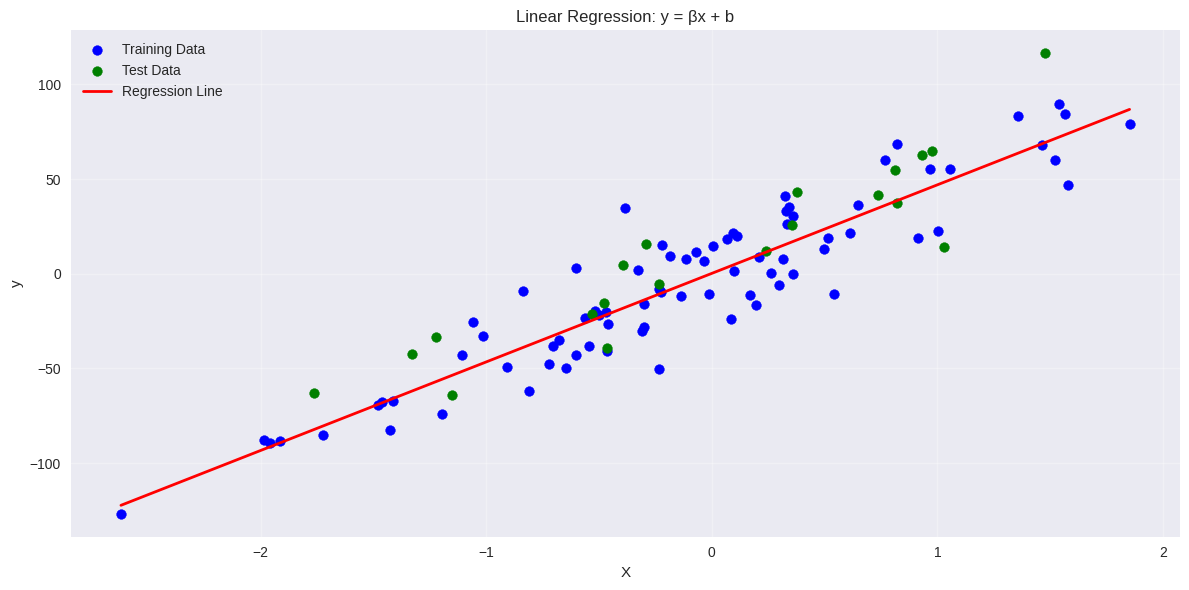


Linear Regression as a Linear Mapping:
Linear regression can be expressed as y = Xβ, where:
- X is the data matrix (with a column of 1s for the intercept)
- β is the coefficient vector [β₀, β₁, ..., βₙ]
- y is the target vector

The coefficient vector β represents a linear mapping from the feature space to the target space.
In this case, our linear function is: y = 0.1984 + 46.7473x

Multiple Linear Regression:
Coefficients: [28.786 73.729 19.819]
Intercept: 2.6075
Mean Squared Error: 495.3872

The multiple linear regression model can be written as:
y = 2.6075 + 28.7860x₁ + 73.7292x₂ + 19.8187x₃

This is still a linear mapping from ℝ³ → ℝ, represented by the weight vector.
Advanced Deep Learning Example:
Input shape: (100, 5)
Layer 1 weights shape: (5, 8)
Layer 1 output shape: (100, 8)
Layer 2 weights shape: (8, 3)
Layer 2 output shape: (100, 3)
Output layer weights shape: (3, 1)
Final output shape: (100, 1)


<ipython-input-23-649680797b71>:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

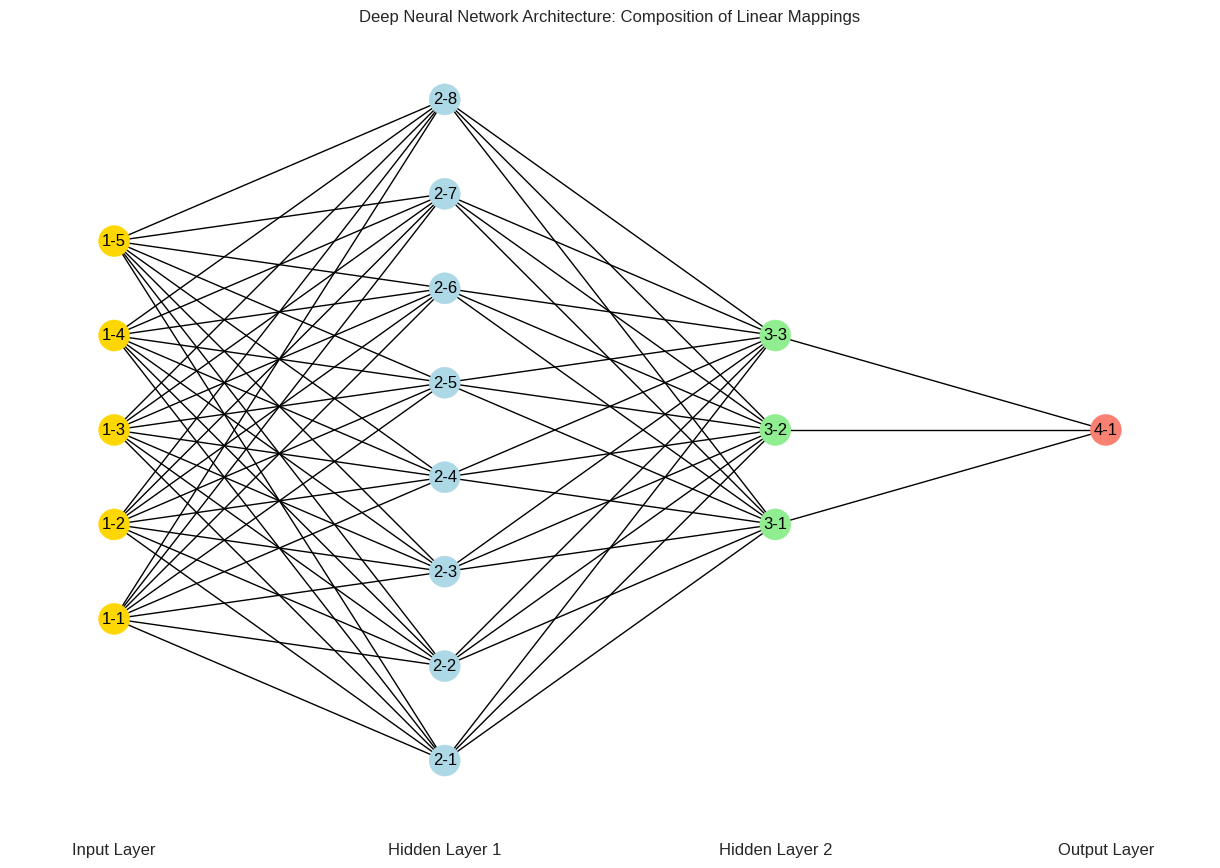

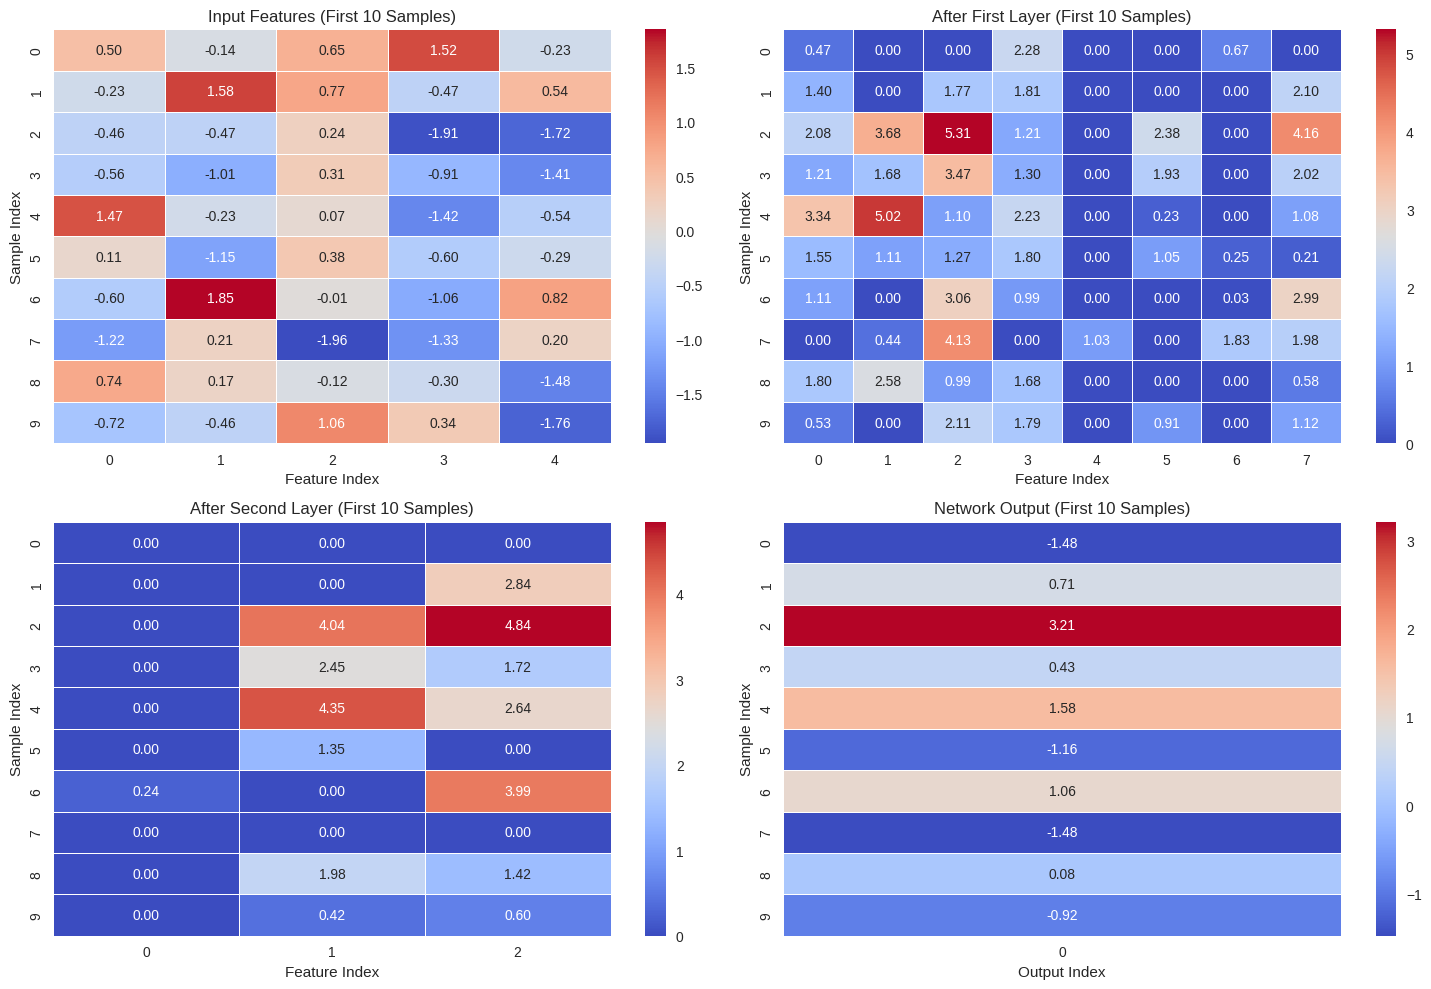


Composition of Linear Mappings in Deep Learning:
In a neural network, we have a series of linear mappings followed by non-linearities:
1. Z₁ = X·W₁ + b₁ (Linear mapping 1)
2. A₁ = ReLU(Z₁) (Non-linearity)
3. Z₂ = A₁·W₂ + b₂ (Linear mapping 2)
4. A₂ = ReLU(Z₂) (Non-linearity)
5. Z₃ = A₂·W₃ + b₃ (Linear mapping 3 / Output)

Each linear mapping transforms the data into a new feature space.
The non-linearities (activations) allow the network to learn complex, non-linear relationships.
Without these non-linearities, multiple layers would be equivalent to a single linear mapping.


In [23]:

## 8.3 Linear Regression

def demonstrate_linear_regression():
    """Demonstrate linear regression as a linear mapping"""
    # Generate synthetic data
    X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    print("Linear Regression Demonstration:")
    print(f"Coefficient (slope): {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")

    # Visualize the linear regression
    plt.figure(figsize=(12, 6))

    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='green', label='Test Data')

    # Plot the regression line
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_line = model.predict(X_line)
    plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression: y = βx + b')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Explain linear regression as a linear mapping
    print("\nLinear Regression as a Linear Mapping:")
    print("Linear regression can be expressed as y = Xβ, where:")
    print("- X is the data matrix (with a column of 1s for the intercept)")
    print("- β is the coefficient vector [β₀, β₁, ..., βₙ]")
    print("- y is the target vector")
    print("\nThe coefficient vector β represents a linear mapping from the feature space to the target space.")
    print(f"In this case, our linear function is: y = {model.intercept_:.4f} + {model.coef_[0]:.4f}x")

    # Multiple Linear Regression Example
    X_multi, y_multi = make_regression(n_samples=100, n_features=3, noise=20, random_state=42)

    # Split the data
    X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

    # Train a linear regression model
    model_multi = LinearRegression()
    model_multi.fit(X_train_multi, y_train_multi)

    # Make predictions
    y_pred_multi = model_multi.predict(X_test_multi)

    # Calculate MSE
    mse_multi = mean_squared_error(y_test_multi, y_pred_multi)

    print("\nMultiple Linear Regression:")
    print(f"Coefficients: {model_multi.coef_}")
    print(f"Intercept: {model_multi.intercept_:.4f}")
    print(f"Mean Squared Error: {mse_multi:.4f}")

    print("\nThe multiple linear regression model can be written as:")
    print(f"y = {model_multi.intercept_:.4f} + {model_multi.coef_[0]:.4f}x₁ + {model_multi.coef_[1]:.4f}x₂ + {model_multi.coef_[2]:.4f}x₃")
    print("\nThis is still a linear mapping from ℝ³ → ℝ, represented by the weight vector.")

demonstrate_linear_regression()

# Advanced Application: Combining Linear Mappings in Deep Learning

def advanced_deep_learning_example():
    """Demonstrate how multiple linear mappings are composed in deep learning architectures"""
    # Generate some data
    np.random.seed(42)
    X = np.random.randn(100, 5)  # 100 samples, 5 features
    w1 = np.random.randn(5, 8)   # Weight matrix for layer 1
    b1 = np.random.randn(8)      # Bias for layer 1
    w2 = np.random.randn(8, 3)   # Weight matrix for layer 2
    b2 = np.random.randn(3)      # Bias for layer 2
    w3 = np.random.randn(3, 1)   # Weight matrix for output layer
    b3 = np.random.randn(1)      # Bias for output layer

    # Forward pass through the network
    def forward_pass(X, weights, biases):
        """Forward pass through a neural network with ReLU activations"""
        Z = []  # Linear outputs
        A = [X]  # Activations (A[0] is the input)

        for i in range(len(weights)):
            z = A[-1] @ weights[i] + biases[i]
            Z.append(z)

            # ReLU activation for all but the last layer
            if i < len(weights) - 1:
                a = np.maximum(0, z)  # ReLU
                A.append(a)
            else:
                A.append(z)  # No activation for the output layer

        return Z, A

    # Compute forward pass
    Z, A = forward_pass(X, [w1, w2, w3], [b1, b2, b3])

    print("Advanced Deep Learning Example:")
    print(f"Input shape: {X.shape}")
    print(f"Layer 1 weights shape: {w1.shape}")
    print(f"Layer 1 output shape: {Z[0].shape}")
    print(f"Layer 2 weights shape: {w2.shape}")
    print(f"Layer 2 output shape: {Z[1].shape}")
    print(f"Output layer weights shape: {w3.shape}")
    print(f"Final output shape: {Z[2].shape}")

    # Visualize the network architecture
    plt.figure(figsize=(12, 8))

    # Create a layered network diagram
    layers = [5, 8, 3, 1]
    layer_names = ['Input Layer', 'Hidden Layer 1', 'Hidden Layer 2', 'Output Layer']

    # Position nodes in each layer
    pos = {}
    node_colors = []
    labels = {}

    node_id = 0
    for i, layer_size in enumerate(layers):
        for j in range(layer_size):
            pos[node_id] = (i, j - layer_size/2)
            node_colors.append(['gold', 'lightblue', 'lightgreen', 'salmon'][i])
            labels[node_id] = f"{i+1}-{j+1}"
            node_id += 1

    # Draw the network
    G = nx.DiGraph()

    # Add nodes
    for i in range(node_id):
        G.add_node(i)

    # Add edges
    edge_id = 0
    for layer in range(len(layers) - 1):
        for i in range(layers[layer]):
            for j in range(layers[layer + 1]):
                source = sum(layers[:layer]) + i
                target = sum(layers[:layer + 1]) + j
                G.add_edge(source, target)
                edge_id += 1

    # Draw the network
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_color=node_colors, node_size=500, labels=labels, arrows=False)

    # Add layer labels
    for i, name in enumerate(layer_names):
        plt.text(i, -5, name, ha='center', fontsize=12)

    plt.title('Deep Neural Network Architecture: Composition of Linear Mappings')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Visualize feature transformations through the network
    plt.figure(figsize=(15, 10))

    # Original features
    plt.subplot(221)
    sns.heatmap(X[:10, :], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    plt.title('Input Features (First 10 Samples)')
    plt.xlabel('Feature Index')
    plt.ylabel('Sample Index')

    # After first layer
    plt.subplot(222)
    sns.heatmap(A[1][:10, :], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    plt.title('After First Layer (First 10 Samples)')
    plt.xlabel('Feature Index')
    plt.ylabel('Sample Index')

    # After second layer
    plt.subplot(223)
    sns.heatmap(A[2][:10, :], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    plt.title('After Second Layer (First 10 Samples)')
    plt.xlabel('Feature Index')
    plt.ylabel('Sample Index')

    # Output
    plt.subplot(224)
    sns.heatmap(A[3][:10, :], cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    plt.title('Network Output (First 10 Samples)')
    plt.xlabel('Output Index')
    plt.ylabel('Sample Index')

    plt.tight_layout()
    plt.show()

    # Demonstrate how compositions of linear mappings work
    print("\nComposition of Linear Mappings in Deep Learning:")
    print("In a neural network, we have a series of linear mappings followed by non-linearities:")
    print("1. Z₁ = X·W₁ + b₁ (Linear mapping 1)")
    print("2. A₁ = ReLU(Z₁) (Non-linearity)")
    print("3. Z₂ = A₁·W₂ + b₂ (Linear mapping 2)")
    print("4. A₂ = ReLU(Z₂) (Non-linearity)")
    print("5. Z₃ = A₂·W₃ + b₃ (Linear mapping 3 / Output)")

    print("\nEach linear mapping transforms the data into a new feature space.")
    print("The non-linearities (activations) allow the network to learn complex, non-linear relationships.")
    print("Without these non-linearities, multiple layers would be equivalent to a single linear mapping.")

# Import networkx for the advanced example
import networkx as nx
advanced_deep_learning_example()